# Optimal number of FCs

Importing Required Libraries

In [ ]:
pip install --upgrade matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
import pypsa
import random
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
zonexy=pd.read_excel("xy.xlsx",sheet_name="Sheet2")  ##Study Area Data
print(zonexy)

      sr  zone   x   y
0      1     0   0  11
1      2     3   0  10
2      3     7   0   9
3      4     6   0   8
4      5     4   0   7
..   ...   ...  ..  ..
175  176     6  14   4
176  177     8  14   3
177  178     3  14   2
178  179     0  14   1
179  180     4  14   0

[180 rows x 4 columns]


In [3]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")


In [4]:
busxy=pd.read_excel("bus1.xlsx")     ##Bus Data
print(busxy)

      sr  zone   x  y
0      1     7   0  9
1      2     7   0  5
2      3     8   0  3
3      4    11   1  9
4      5    13   1  6
..   ...   ...  .. ..
113  114    12  13  4
114  115    15  13  3
115  116    13  13  2
116  117     7  14  7
117  118     8  14  3

[118 rows x 4 columns]


In [5]:
def xyfc(ns):                        ##Funtion to place station Equdistantly
    
    x=118//(ns+1)
    xy=[]
    nos=x
    n=0
    while(n<ns):
    
        xcor=busxy['x'][nos-1]
        ycor=busxy['y'][nos-1]
        xy.append([xcor,ycor])
        nos+=x
        n+=1
    return(xy)

In [6]:
def s(j):                            ##Function for S(j)
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1

In [7]:
def sdc(cha):                         ##Function to calculate SDC
    
    val=70000+(25*240*s(cha))+(208.33*(s(cha)-1)*96)
    return val

In [8]:
def evuc(z):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=lis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=lis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals
    
    

Process to find the Optimal Number of FCs

In [9]:
sdcarr=[]
xaxis=[]
for ns in range(5,16):
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    xaxis.append(ns)

    for j in range(1,181):

        dist=100000000
        h=0
        lis=xyfc(ns)
        for i in lis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(lis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
       
    sdcval=0
    for x in range(1,ns+1):
        
        value=sdc(x)
        sdcval+=value
    evval=0
    for zon in range(1,181):
       
        evval+=evuc(zon)
        
    sdcval+=evval
    
    sdcarr.append(sdcval)
    
print(sdcarr)
print(xaxis)
#print(zdata)
        
    
    
    
    

[4758107.043948352, 4716736.866156581, 4743671.780449519, 4783093.592155193, 4853034.630667915, 4930601.911632003, 5010335.218234033, 5056115.271347978, 5035300.7746197125, 5060542.890124918, 5101908.575189765]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


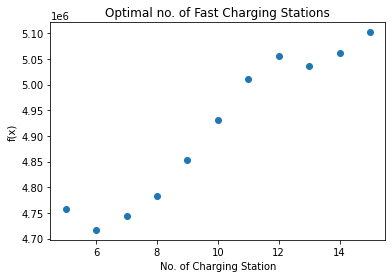

In [10]:
plt.scatter(xaxis,sdcarr)    ##Plotting of Objective Function
plt.title("Optimal no. of Fast Charging Stations")
plt.xlabel("No. of Charging Station")
plt.ylabel("f(x)")
plt.show()

In [11]:
optimal_fcs=xaxis[sdcarr.index(min(sdcarr))]         ##Min number of FCs required.
optimal_fcs


6

In [12]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
xaxis.append(ns)

for j in range(1,181):

    dist=100000000
    h=0
    lis=xyfc(optimal_fcs)
    for i in lis:
        x1=zonexy['x'][j-1]
        x2=i[0]
        y1=zonexy['y'][j-1]
        y2=i[1]

        dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if(dist1<dist):
            dist=dist1
            h=(lis.index(i))+1

    df2 = {'st': h, 'zone':j}
    zdata = zdata.append(df2, ignore_index = True)
        
zdata

,zone,st
0,1,3
1,2,3
2,3,2
3,4,2
4,5,2
...,...,...
175,176,6
176,177,6
177,178,6
178,179,6


In [13]:
xy_buses=[]
x_bus=list(busxy['x'])
y_bus=list(busxy['y'])

for i in range(len(x_bus)):
    x=[x_bus[i],y_bus[i]]
    xy_buses.append(x)
xy_buses

[[0, 9],
 [0, 5],
 [0, 3],
 [1, 9],
 [1, 6],
 [1, 5],
 [1, 4],
 [1, 3],
 [1, 2],
 [2, 9],
 [2, 8],
 [2, 7],
 [2, 6],
 [2, 4],
 [2, 3],
 [2, 2],
 [2, 1],
 [3, 10],
 [3, 9],
 [3, 8],
 [3, 7],
 [3, 6],
 [3, 5],
 [3, 4],
 [3, 3],
 [3, 2],
 [3, 1],
 [4, 9],
 [4, 8],
 [4, 7],
 [4, 6],
 [4, 5],
 [4, 4],
 [4, 3],
 [4, 2],
 [4, 1],
 [5, 11],
 [5, 10],
 [5, 9],
 [5, 8],
 [5, 7],
 [5, 6],
 [5, 5],
 [5, 4],
 [5, 3],
 [5, 2],
 [6, 10],
 [6, 9],
 [6, 8],
 [6, 7],
 [6, 6],
 [6, 5],
 [6, 3],
 [6, 2],
 [7, 10],
 [7, 9],
 [7, 8],
 [7, 7],
 [7, 6],
 [7, 5],
 [7, 4],
 [7, 2],
 [7, 0],
 [8, 10],
 [8, 9],
 [8, 8],
 [8, 6],
 [8, 5],
 [8, 4],
 [8, 3],
 [8, 2],
 [8, 1],
 [9, 10],
 [9, 9],
 [9, 8],
 [9, 7],
 [9, 6],
 [9, 5],
 [9, 4],
 [9, 3],
 [9, 2],
 [10, 11],
 [10, 10],
 [10, 9],
 [10, 8],
 [10, 7],
 [10, 6],
 [10, 5],
 [10, 4],
 [10, 3],
 [10, 2],
 [11, 10],
 [11, 8],
 [11, 7],
 [11, 6],
 [11, 5],
 [11, 4],
 [11, 3],
 [11, 2],
 [12, 11],
 [12, 9],
 [12, 8],
 [12, 7],
 [12, 6],
 [12, 5],
 [12, 4],
 [12, 3],


In [14]:
ran_pop=[]
for i in range(100):
    rand=random.sample(xy_buses, optimal_fcs)
    ran_pop.append(rand)
print(ran_pop[:10])

[[[11, 6], [7, 4], [8, 6], [12, 9], [12, 11], [8, 1]], [[12, 8], [7, 8], [1, 6], [1, 9], [4, 1], [6, 8]], [[0, 9], [14, 7], [12, 4], [8, 9], [3, 8], [9, 10]], [[6, 5], [12, 8], [5, 4], [3, 7], [13, 7], [7, 8]], [[7, 6], [10, 6], [5, 6], [13, 2], [6, 9], [11, 7]], [[1, 4], [4, 4], [9, 9], [0, 3], [3, 1], [4, 9]], [[10, 8], [8, 2], [6, 8], [10, 3], [3, 6], [5, 8]], [[6, 2], [7, 9], [11, 3], [9, 9], [3, 8], [13, 3]], [[12, 2], [9, 2], [4, 5], [6, 7], [3, 10], [3, 2]], [[10, 6], [11, 5], [8, 1], [3, 2], [3, 5], [12, 2]]]


In [15]:
len(ran_pop)

100

In [16]:
network=pypsa.Network()

nbus=118
for i in range(1,nbus+1):
    network.add("Bus","Bus No {}".format(i),v_nom=138)


    
print(network.buses)

attribute   v_nom type    x    y carrier  unit  v_mag_pu_set  v_mag_pu_min  \
Bus No 1    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 2    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 3    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 4    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 5    138.0       0.0  0.0      AC  None           1.0           0.0   
...           ...  ...  ...  ...     ...   ...           ...           ...   
Bus No 114  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 115  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 116  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 117  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 118  138.0       0.0  0.0      AC  None           1.0           0.0   

attribute   v_mag_pu_max control sub_network  
Bus No 1        

In [17]:
line_data=pd.read_excel("line_data.xlsx")
line_data

,fbus,tbus,r,x
0,1,2,0.03030,0.09990
1,1,3,0.01290,0.04240
2,4,5,0.00176,0.00798
3,3,5,0.02410,0.10800
4,5,6,0.01190,0.05400
...,...,...,...,...
181,114,115,0.00230,0.01040
182,68,116,0.00034,0.00405
183,12,117,0.03290,0.14000
184,75,118,0.01450,0.04810


In [18]:
for i in range(186):
    network.add("Line","Line No {}".format(i),bus0="Bus No {}".format(line_data['fbus'][i])
    ,bus1="Bus No {}".format(line_data['tbus'][i]),r=line_data['r'][i],x=line_data['x'][i])
    
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line No 0,Bus No 1,Bus No 2,,0.09990,0.03030,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 1,Bus No 1,Bus No 3,,0.04240,0.01290,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 2,Bus No 4,Bus No 5,,0.00798,0.00176,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 3,Bus No 3,Bus No 5,,0.10800,0.02410,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 4,Bus No 5,Bus No 6,,0.05400,0.01190,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Line No 181,Bus No 114,Bus No 115,,0.01040,0.00230,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 182,Bus No 68,Bus No 116,,0.00405,0.00034,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 183,Bus No 12,Bus No 117,,0.14000,0.03290,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 184,Bus No 75,Bus No 118,,0.04810,0.01450,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
network.add("Generator","Slack Gen",bus="Bus No 1",p_set=0,control="Slack")

In [20]:
gen_data=pd.read_excel("generator data.xlsx")
gen_data

,bus no,p_set
0,1,100.0
1,4,100.0
2,6,100.0
3,8,100.0
4,10,550.0
5,12,185.0
6,15,100.0
7,18,100.0
8,19,100.0
9,24,100.0


In [21]:
for i in range(1,54):
    network.add("Generator","Gen No {}".format(i+1),bus="Bus No {}".format(gen_data['bus no'][i]),p_set=gen_data['p_set'][i],control="PV")
    
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Slack Gen,Bus No 1,Slack,,0.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 2,Bus No 4,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 3,Bus No 6,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 4,Bus No 8,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 5,Bus No 10,PV,,0.0,False,0.0,inf,0.0,1.0,550.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 6,Bus No 12,PV,,0.0,False,0.0,inf,0.0,1.0,185.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 7,Bus No 15,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 8,Bus No 18,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 9,Bus No 19,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 10,Bus No 24,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [22]:
load_data=pd.read_excel("load data.xlsx")
o=15
for i in range(19):
    network.add("Load","Load No {}".format(o),bus="Bus No {}".format(load_data['Bus'][i]),p_set=load_data['P'][i],q_set=load_data['Q'][i])
    o+=1
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load No 15,Bus No 1,,,541.4,86.6,-1.0
Load No 16,Bus No 3,,,414.0,106.2,-1.0
Load No 17,Bus No 2,,,212.3,95.5,-1.0
Load No 18,Bus No 117,,,212.3,84.9,-1.0
Load No 19,Bus No 12,,,498.9,106.2,-1.0
Load No 20,Bus No 11,,,743.1,244.2,-1.0
Load No 21,Bus No 16,,,265.4,106.2,-1.0
Load No 22,Bus No 18,,,636.9,360.9,-1.0
Load No 23,Bus No 20,,,191.1,31.8,-1.0
Load No 24,Bus No 21,,,148.6,84.9,-1.0


In [23]:
def capFCS(j,zdata):
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1*96
    
    

In [24]:
def f2(x):
    xylis=[]
    print(x)
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    print(xylis)
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=1-mini
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev*100

In [25]:
def f3(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df3 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df3.p0.iloc[0][i]+df3.p1.iloc[0][i])
    
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i)) 
        
    return abs(nploss*250.57)
        

In [26]:
def evucnew(z,xylis):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=xylis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=xylis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals/20

In [45]:


x=[16,32,48,64,80,96]
ini_evuc = 0
xylis=[]

for busno in x:
    xbus=busxy['x'][busno-1]
    ybus=busxy['y'][busno-1]
    xylis.append([xbus,ybus])

zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
for j in range(1,181):

    dist=100000000
    h=0

    for i in xylis:
        x1=zonexy['x'][j-1]
        x2=i[0]
        y1=zonexy['y'][j-1]
        y2=i[1]

        dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if(dist1<dist):
            dist=dist1
            h=(xylis.index(i))+1

    df2 = {'st': h, 'zone':j}
    zdata = zdata.append(df2, ignore_index = True)

    
for zon in range(1,181):
    ini_evuc+=evucnew(zon,xylis)
    
ini_npl=f3(x)
ini_mvd=f2(x)
print("Evuc,mvd,npl")
print(ini_evuc,ini_mvd,ini_npl)
    
  

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.085017 seconds


[16, 32, 48, 64, 80, 96]
[[2, 2], [4, 5], [6, 9], [8, 10], [9, 3], [11, 5]]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059842 seconds


Evuc,mvd,npl
8679.358507829016 0.290594446987269 208613.05615679195


In [55]:
class Individual(object):

    def __init__(self):
        self.rank = None
        self.crowding_distance = None
        self.domination_count = None
        self.dominated_solutions = None
        self.features = None
        self.objectives = None

    def __eq__(self, other):
        if isinstance(self, other.__class__):
            return self.features == other.features
        return False

    def dominates(self, other_individual):
        and_condition = True
        or_condition = False
        for first, second in zip(self.objectives, other_individual.objectives):
            and_condition = and_condition and first <= second
            or_condition = or_condition or first < second
        return (and_condition and or_condition)


class Population:

    def __init__(self):
        self.population = []
        self.fronts = []

    def __len__(self):
        return len(self.population)

    def __iter__(self):
        return self.population.__iter__()

    def extend(self, new_individuals):
        self.population.extend(new_individuals)

    def append(self, new_individual):
        self.population.append(new_individual)

        

import random

class Problem:

    def __init__(self, objectives, num_of_variables, variables_range, expand=True, same_range=False):
        self.num_of_objectives = len(objectives)
        self.num_of_variables = num_of_variables
        self.objectives = objectives
        self.expand = expand
        self.variables_range = []
        if same_range:
            for _ in range(num_of_variables):
                self.variables_range.append(variables_range[0])
        else:
            self.variables_range = variables_range

    def generate_individual(self):
        individual = Individual()
        
        varran=[x for x in range(self.variables_range[0][0],self.variables_range[0][1]+1)]
        
        individual.features = random.sample(varran,6)
        print(individual.features)
        return individual

    def calculate_objectives(self, individual):
        
        xylis=[]
        x=individual.features
        for busno in x:
            xbus=busxy['x'][busno-1]
            ybus=busxy['y'][busno-1]
            xylis.append([xbus,ybus])

        zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
        for j in range(1,181):

            dist=100000000
            h=0

            for i in xylis:
                x1=zonexy['x'][j-1]
                x2=i[0]
                y1=zonexy['y'][j-1]
                y2=i[1]

                dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
                if(dist1<dist):
                    dist=dist1
                    h=(xylis.index(i))+1

            df2 = {'st': h, 'zone':j}
            zdata = zdata.append(df2, ignore_index = True)
            k=1
        k=1
        for i in x:
            network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
            k+=1
        network.pf()
        df3 = network
        if self.expand:
            ##print(individual.features)
            individual.objectives = [f(*individual.features,zdata,xylis,df3) for f in self.objectives]
        else:
            ##print(individual.features)
            
            individual.objectives = [f(individual.features,zdata,xylis,df3) for f in self.objectives]
            
            

class NSGA2Utils:

    def __init__(self, problem, num_of_individuals=100,
                 num_of_tour_particips=2, tournament_prob=0.9, crossover_param=2, mutation_param=5):

        self.problem = problem
        self.num_of_individuals = num_of_individuals
        self.num_of_tour_particips = num_of_tour_particips
        self.tournament_prob = tournament_prob
        self.crossover_param = crossover_param
        self.mutation_param = mutation_param

    def create_initial_population(self):
        population = Population()
        
        for i in range(self.num_of_individuals):
            individual = self.problem.generate_individual()
            self.problem.calculate_objectives(individual)
            population.append(individual)
            #print(population.population[i].features)
        
        return population

    def fast_nondominated_sort(self, population):
        population.fronts = [[]]
        for individual in population:
            individual.domination_count = 0
            individual.dominated_solutions = []
            for other_individual in population:
                if individual.dominates(other_individual):
                    individual.dominated_solutions.append(other_individual)
                elif other_individual.dominates(individual):
                    individual.domination_count += 1
            if individual.domination_count == 0:
                individual.rank = 0
                population.fronts[0].append(individual)
        i = 0
        while len(population.fronts[i]) > 0:
            temp = []
            for individual in population.fronts[i]:
                for other_individual in individual.dominated_solutions:
                    other_individual.domination_count -= 1
                    if other_individual.domination_count == 0:
                        other_individual.rank = i+1
                        temp.append(other_individual)
            i = i+1
            population.fronts.append(temp)

    def calculate_crowding_distance(self, front):
        if len(front) > 0:
            solutions_num = len(front)
            for individual in front:
                individual.crowding_distance = 0

            for m in range(len(front[0].objectives)):
                front.sort(key=lambda individual: individual.objectives[m])
                front[0].crowding_distance = 10**9
                front[solutions_num-1].crowding_distance = 10**9
                m_values = [individual.objectives[m] for individual in front]
                scale = max(m_values) - min(m_values)
                if scale == 0: scale = 1
                for i in range(1, solutions_num-1):
                    front[i].crowding_distance += (front[i+1].objectives[m] - front[i-1].objectives[m])/scale

    def crowding_operator(self, individual, other_individual):
        if (individual.rank < other_individual.rank) or \
            ((individual.rank == other_individual.rank) and (individual.crowding_distance > other_individual.crowding_distance)):
            return 1
        else:
            return -1

    def create_children(self, population):
        children = []
        while len(children) < len(population):
            parent1 = self.__tournament(population)
            parent2 = parent1
            while parent1 == parent2:
                parent2 = self.__tournament(population)
            child1, child2 = self.__crossover(parent1, parent2)
            self.__mutate(child1)
            self.__mutate(child2)
            self.problem.calculate_objectives(child1)
            self.problem.calculate_objectives(child2)
            children.append(child1)
            children.append(child2)

        return children

    def __crossover(self, individual1, individual2):
        child1 = self.problem.generate_individual()
        child2 = self.problem.generate_individual()
        num_of_features = len(child1.features)
        genes_indexes = range(num_of_features)
        for i in genes_indexes:
            beta = self.__get_beta()
            x1 = ((individual1.features[i] + individual2.features[i])/2)
            x2 = abs((individual1.features[i] - individual2.features[i])/2)
            child1.features[i] = round(x1 + beta*x2)
            child2.features[i] = round(x1 - beta*x2)
        return child1, child2

    def __get_beta(self):
        u = random.random()
        if u <= 0.5:
            return (2*u)**(1/(self.crossover_param+1))
        return (2*(1-u))**(-1/(self.crossover_param+1))

    def __mutate(self, child):
        num_of_features = len(child.features)
        for gene in range(num_of_features):
            u, delta = self.__get_delta()
            if u < 0.5:
                child.features[gene] += round(delta*(child.features[gene] - self.problem.variables_range[gene][0]))
            else:
                child.features[gene] += round(delta*(self.problem.variables_range[gene][1] - child.features[gene]))
            if child.features[gene] < self.problem.variables_range[gene][0]:
                child.features[gene] = round(self.problem.variables_range[gene][0])
            elif child.features[gene] > self.problem.variables_range[gene][1]:
                child.features[gene] = round(self.problem.variables_range[gene][1])

    def __get_delta(self):
        u = random.random()
        if u < 0.5:
            return u, ((2*u)**(1/(self.mutation_param + 1))) - 1
        return u, (1 - (2*(1-u))**(1/(self.mutation_param + 1)))

    def __tournament(self, population):
       
        participants = random.sample(population.population, self.num_of_tour_particips)
        
        best = None
        for participant in participants:
            if best is None or (self.crowding_operator(participant, best) == 1 and self.__choose_with_prob(self.tournament_prob)):
                best = participant

        return best

    def __choose_with_prob(self, prob):
        if random.random() <= prob:
            return True
        return False

    

class Evolution:

    def __init__(self, problem, num_of_generations=40, num_of_individuals=20, num_of_tour_particips=2, tournament_prob=0.7, crossover_param=3, mutation_param=5):
        self.utils = NSGA2Utils(problem, num_of_individuals, num_of_tour_particips, tournament_prob, crossover_param, mutation_param)
        self.population = None
        self.num_of_generations = num_of_generations
        self.on_generation_finished = []
        self.num_of_individuals = num_of_individuals

    def evolve(self):
        self.population = self.utils.create_initial_population()
        self.utils.fast_nondominated_sort(self.population)
        for front in self.population.fronts:
            self.utils.calculate_crowding_distance(front)
        children = self.utils.create_children(self.population)
        returned_population = None
        for i in range(self.num_of_generations):
            self.population.extend(children)
            self.utils.fast_nondominated_sort(self.population)
            new_population = Population()
            front_num = 0
            while len(new_population) + len(self.population.fronts[front_num]) <= self.num_of_individuals:
                self.utils.calculate_crowding_distance(self.population.fronts[front_num])
                new_population.extend(self.population.fronts[front_num])
                front_num += 1
            self.utils.calculate_crowding_distance(self.population.fronts[front_num])
            self.population.fronts[front_num].sort(key=lambda individual: individual.crowding_distance, reverse=True)
            new_population.extend(self.population.fronts[front_num][0:self.num_of_individuals-len(new_population)])
            returned_population = self.population
            self.population = new_population
            self.utils.fast_nondominated_sort(self.population)
            for front in self.population.fronts:
                self.utils.calculate_crowding_distance(front)
            children = self.utils.create_children(self.population)
        return returned_population.fronts[0]


In [28]:
import math
 
def minimax (curDepth, nodeIndex,
             maxTurn, scores,
             targetDepth):
 
    # base case : targetDepth reached
    if (curDepth == targetDepth):
        return scores[nodeIndex]
     
    if (maxTurn):
        return max(minimax(curDepth + 1, nodeIndex * 2,
                    False, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                    False, scores, targetDepth))
     
    else:
        return min(minimax(curDepth + 1, nodeIndex * 2,
                     True, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                     True, scores, targetDepth))
     
# Driver code


In [29]:
def f3(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df3 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df3.p0.iloc[0][i]+df3.p1.iloc[0][i])
        
        
    return abs(nploss)
        

##  CASE 1

[44, 24, 21, 26, 48, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.190011 seconds


[50, 48, 71, 33, 25, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.275270 seconds


[58, 6, 11, 66, 76, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.115954 seconds


[63, 40, 109, 92, 65, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149976 seconds


[110, 7, 113, 56, 3, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.359512 seconds


[20, 53, 114, 15, 36, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.175745 seconds


[69, 12, 51, 17, 88, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.125663 seconds


[86, 68, 3, 102, 73, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.179488 seconds


[19, 106, 57, 64, 110, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.339026 seconds


[41, 93, 95, 36, 63, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.174534 seconds


[112, 60, 2, 20, 73, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.199463 seconds


[88, 80, 59, 46, 13, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.134982 seconds


[74, 20, 32, 1, 55, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.155794 seconds


[75, 16, 98, 49, 100, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.131644 seconds


[61, 97, 45, 20, 31, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.341589 seconds


[51, 21, 59, 100, 4, 101]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.111909 seconds


[64, 63, 102, 56, 29, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.156032 seconds


[10, 89, 78, 102, 109, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110010 seconds


[80, 6, 27, 79, 34, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.148783 seconds


[88, 39, 73, 53, 107, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.118920 seconds


[86, 1, 38, 81, 55, 118]
[88, 116, 15, 9, 83, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.098002 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.116034 seconds


[30, 12, 97, 13, 48, 65]
[22, 48, 106, 61, 62, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.097002 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.093965 seconds


[33, 93, 99, 46, 110, 51]
[6, 70, 24, 76, 103, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.103720 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.105273 seconds


[35, 79, 93, 115, 89, 36]
[9, 47, 91, 72, 101, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.097656 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.096752 seconds


[47, 62, 61, 46, 65, 118]
[87, 50, 45, 14, 7, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.093031 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.096973 seconds


[85, 30, 116, 24, 74, 26]
[16, 67, 110, 20, 87, 47]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099429 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.190492 seconds


[82, 39, 90, 89, 78, 16]
[77, 107, 13, 4, 67, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.088764 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095505 seconds


[53, 96, 75, 82, 51, 55]
[76, 44, 21, 60, 29, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.103769 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.097259 seconds


[75, 16, 3, 111, 12, 34]
[11, 27, 47, 86, 110, 113]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.129912 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110754 seconds


[76, 56, 112, 15, 17, 50]
[10, 83, 28, 7, 65, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.118943 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.125956 seconds


[100, 75, 112, 51, 118, 53]
[91, 116, 76, 98, 93, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.112011 seconds


[43, 2, 4, 99, 74, 42]
[91, 102, 20, 32, 7, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.125056 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.107046 seconds


[34, 43, 118, 113, 24, 5]
[113, 14, 75, 92, 106, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.263004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.116972 seconds


[96, 42, 71, 26, 64, 100]
[52, 94, 95, 78, 69, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.103271 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.108954 seconds


[38, 44, 49, 26, 74, 85]
[11, 112, 106, 71, 36, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.101578 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.118684 seconds


[72, 27, 85, 31, 48, 15]
[26, 97, 73, 72, 78, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.111701 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099251 seconds


[98, 86, 60, 9, 118, 8]
[112, 58, 82, 32, 29, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.101091 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.107031 seconds


[91, 1, 41, 74, 79, 21]
[63, 113, 100, 34, 17, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.115031 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.126012 seconds


[69, 108, 45, 76, 4, 103]
[58, 33, 114, 65, 44, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.124968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.139191 seconds


[93, 62, 57, 76, 13, 102]
[88, 27, 39, 73, 63, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.112910 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.091774 seconds


[63, 54, 59, 109, 16, 85]
[96, 28, 49, 82, 74, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.112264 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110032 seconds


[76, 64, 24, 22, 17, 82]
[63, 13, 109, 19, 98, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099406 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110700 seconds


[101, 88, 92, 3, 36, 32]
[44, 89, 84, 75, 35, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.119014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.114191 seconds


[19, 39, 52, 82, 10, 89]
[97, 53, 75, 74, 31, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.088597 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.096740 seconds


[85, 95, 106, 25, 111, 69]
[53, 62, 12, 67, 49, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110705 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.090082 seconds


[63, 65, 44, 84, 64, 16]
[68, 39, 100, 1, 53, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089195 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.131979 seconds


[33, 47, 8, 102, 48, 2]
[70, 89, 7, 45, 13, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.072933 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.094752 seconds


[69, 117, 71, 58, 45, 118]
[55, 29, 77, 63, 36, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.120677 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.120881 seconds


[14, 36, 84, 59, 41, 108]
[55, 37, 56, 67, 62, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.123018 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.147958 seconds


[6, 26, 111, 114, 3, 115]
[74, 73, 114, 68, 91, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.130004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137871 seconds


[56, 75, 41, 106, 24, 25]
[50, 106, 113, 7, 19, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.133905 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137053 seconds


[2, 73, 89, 40, 74, 41]
[93, 111, 112, 70, 56, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.168059 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.234004 seconds


[40, 19, 21, 82, 117, 28]
[28, 79, 4, 36, 65, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164958 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.200878 seconds


[52, 101, 11, 18, 40, 76]
[18, 16, 2, 62, 42, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.179001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.212024 seconds


[79, 107, 27, 53, 73, 39]
[35, 28, 107, 15, 9, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.173968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.215033 seconds


[13, 61, 78, 96, 110, 33]
[60, 111, 57, 115, 61, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.172020 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.183976 seconds


[50, 14, 64, 47, 56, 68]
[88, 92, 28, 11, 33, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.187021 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164989 seconds


[15, 43, 28, 106, 23, 10]
[113, 91, 15, 107, 55, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.196740 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.156001 seconds


[49, 29, 34, 16, 94, 64]
[84, 109, 35, 102, 39, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.189013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.162038 seconds


[77, 22, 80, 20, 112, 60]
[78, 83, 29, 115, 73, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.215040 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.131738 seconds


[50, 57, 65, 111, 15, 67]
[99, 19, 100, 32, 84, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.187016 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.215990 seconds


[34, 48, 118, 50, 93, 15]
[65, 87, 81, 97, 72, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.425997 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.241076 seconds


[76, 32, 83, 88, 78, 68]
[96, 56, 106, 75, 108, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.170865 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.263297 seconds


[18, 96, 86, 71, 9, 42]
[29, 88, 94, 70, 25, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.197022 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.154581 seconds


[117, 63, 96, 89, 40, 15]
[19, 45, 98, 20, 92, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.150598 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.190099 seconds


[109, 33, 27, 85, 42, 44]
[102, 71, 100, 61, 37, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.144928 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.176526 seconds


[40, 79, 6, 17, 21, 27]
[33, 67, 42, 116, 10, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.215022 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.162559 seconds


[107, 83, 51, 114, 54, 33]
[109, 16, 54, 78, 58, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.155584 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.156123 seconds


[7, 76, 20, 36, 59, 84]
[112, 105, 12, 107, 46, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.162563 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.283310 seconds


[31, 52, 63, 17, 6, 96]
[111, 118, 5, 17, 92, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.311310 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.257311 seconds


[109, 98, 11, 92, 102, 2]
[28, 44, 8, 80, 63, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.263295 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.218415 seconds


[29, 11, 90, 9, 44, 83]
[11, 114, 49, 55, 68, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.160571 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.231047 seconds


[67, 56, 57, 70, 113, 111]
[90, 2, 68, 77, 112, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.263160 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.305926 seconds


[38, 91, 70, 5, 17, 74]
[75, 74, 115, 93, 109, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.341077 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.302710 seconds


[88, 27, 82, 59, 24, 103]
[37, 41, 7, 48, 1, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.199065 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.231381 seconds


[43, 41, 40, 29, 114, 34]
[55, 56, 97, 104, 112, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.315160 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.292218 seconds


[55, 15, 29, 78, 74, 80]
[8, 99, 45, 26, 61, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.203457 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.274266 seconds


[33, 80, 40, 66, 49, 103]
[84, 45, 63, 99, 20, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.212419 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.320665 seconds


[23, 76, 117, 55, 101, 37]
[76, 87, 108, 9, 12, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.202448 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.217930 seconds


[102, 90, 115, 55, 18, 95]
[88, 50, 36, 74, 1, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.400025 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.472645 seconds


[21, 109, 111, 64, 88, 116]
[52, 101, 108, 41, 83, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.430367 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.177525 seconds


[17, 50, 42, 1, 11, 61]
[3, 56, 107, 61, 96, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.283902 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.207929 seconds


[8, 10, 4, 102, 38, 101]
[31, 58, 54, 116, 75, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.175052 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.216860 seconds


[38, 33, 92, 43, 58, 85]
[38, 84, 111, 48, 13, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.208497 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.179979 seconds


[56, 87, 90, 18, 20, 14]
[88, 112, 26, 73, 4, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.211901 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164020 seconds


[97, 15, 40, 61, 85, 49]
[68, 89, 73, 53, 82, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.204005 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.173932 seconds


[39, 35, 111, 13, 116, 37]
[58, 13, 97, 93, 72, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.169025 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.333187 seconds


[2, 50, 28, 86, 108, 53]
[52, 25, 39, 81, 78, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.292903 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.255838 seconds


[59, 21, 106, 83, 103, 80]
[101, 49, 43, 93, 115, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.183017 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.352129 seconds


[85, 41, 97, 65, 69, 59]
[89, 51, 117, 71, 76, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.356115 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.248148 seconds


[99, 103, 111, 27, 72, 115]
[52, 99, 30, 109, 53, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.242877 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.188991 seconds


[50, 6, 18, 47, 69, 4]
[44, 91, 75, 29, 43, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.136024 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.187045 seconds


[16, 30, 22, 9, 29, 58]
[8, 75, 34, 9, 93, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.235084 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.205925 seconds


[48, 109, 38, 98, 12, 107]
[32, 47, 1, 65, 51, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.279022 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.165033 seconds


[113, 8, 29, 87, 9, 43]
[23, 27, 83, 1, 55, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.153956 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.194983 seconds


[22, 94, 54, 34, 109, 101]
[7, 73, 31, 59, 90, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.134730 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164558 seconds


[47, 112, 101, 8, 97, 109]
[3, 82, 2, 105, 11, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.114723 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.153896 seconds


[44, 66, 80, 114, 108, 84]
[89, 63, 109, 53, 118, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.142622 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.126659 seconds


[63, 46, 42, 75, 96, 106]
[112, 48, 52, 2, 111, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138630 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.148063 seconds


[88, 2, 52, 111, 5, 24]
[7, 63, 12, 37, 105, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.169547 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.155582 seconds


[85, 59, 78, 20, 13, 96]
[78, 57, 33, 95, 113, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.143614 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.174534 seconds


[87, 110, 45, 80, 52, 118]
[103, 42, 2, 99, 35, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.146908 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.159574 seconds


[79, 71, 32, 43, 1, 33]
[50, 10, 9, 61, 117, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138149 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149118 seconds


[87, 78, 96, 50, 117, 100]
[103, 97, 113, 9, 62, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.145161 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.158127 seconds


[71, 4, 43, 44, 106, 67]
[82, 26, 27, 93, 20, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137034 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.197610 seconds


[23, 58, 41, 118, 64, 19]
[92, 22, 36, 82, 23, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.131109 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.130922 seconds


[4, 70, 6, 16, 41, 15]
[8, 14, 88, 20, 73, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.154960 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.161065 seconds


[28, 12, 16, 65, 90, 19]
[81, 48, 45, 63, 67, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.129648 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.142134 seconds


[5, 68, 112, 33, 40, 118]
[52, 11, 61, 90, 67, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.126942 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.163563 seconds


[36, 28, 46, 84, 26, 27]
[88, 69, 77, 103, 66, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.148600 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.154996 seconds


[48, 80, 10, 60, 95, 57]
[72, 50, 94, 62, 32, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.136632 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.154461 seconds


[23, 2, 32, 75, 84, 12]
[44, 79, 52, 15, 3, 61]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.141496 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.122005 seconds


[93, 58, 75, 61, 99, 115]
[45, 108, 10, 91, 79, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.099986 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.114051 seconds


[94, 37, 55, 96, 35, 27]
[3, 28, 15, 102, 72, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.135028 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.149600 seconds


[28, 48, 3, 17, 62, 34]
[115, 75, 108, 29, 5, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.208956 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.135013 seconds


[5, 30, 104, 41, 91, 4]
[6, 114, 95, 30, 17, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149990 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.129039 seconds


[47, 41, 108, 7, 22, 43]
[37, 77, 56, 20, 55, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.155089 seconds


[46, 12, 56, 52, 37, 14]
[15, 97, 14, 59, 12, 104]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.168956 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.145985 seconds


[87, 100, 27, 17, 57, 107]
[3, 85, 81, 84, 24, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.266022 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.188981 seconds


[112, 56, 109, 91, 4, 39]
[113, 64, 90, 62, 53, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.220870 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.190041 seconds


[65, 56, 48, 113, 33, 89]
[43, 96, 102, 104, 91, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.143958 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.129938 seconds


[17, 81, 39, 92, 78, 66]
[101, 114, 62, 82, 87, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.153968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.151203 seconds


[3, 70, 109, 38, 39, 75]
[18, 19, 31, 22, 118, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.168065 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.195136 seconds


[49, 59, 73, 34, 61, 56]
[90, 58, 22, 100, 82, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164018 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.171020 seconds


[1, 85, 28, 102, 93, 44]
[9, 111, 83, 21, 89, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.176541 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.198031 seconds


[98, 68, 89, 82, 104, 110]
[1, 112, 63, 91, 109, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.145992 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110028 seconds


[109, 49, 71, 1, 20, 14]
[54, 77, 8, 20, 44, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.169927 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.096006 seconds


[76, 104, 19, 9, 36, 4]
[108, 11, 56, 77, 40, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.162968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.240992 seconds


[36, 29, 111, 99, 16, 5]
[108, 7, 8, 30, 72, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.134006 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.173991 seconds


[6, 61, 45, 84, 64, 86]
[43, 117, 23, 51, 53, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.147998 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.144012 seconds


[98, 88, 36, 66, 22, 44]
[22, 87, 18, 72, 83, 113]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.185160 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.189969 seconds


[37, 91, 71, 102, 59, 46]
[30, 73, 95, 117, 32, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.142660 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.106029 seconds


[17, 30, 37, 117, 51, 43]
[21, 22, 41, 31, 34, 113]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.116276 seconds


[24, 96, 1, 112, 102, 17]
[90, 6, 58, 45, 37, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109998 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110475 seconds


[48, 103, 16, 95, 64, 11]
[20, 27, 35, 52, 48, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.128013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.150979 seconds


[87, 31, 21, 50, 86, 106]
[48, 85, 118, 100, 83, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.101027 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.217019 seconds


[61, 109, 92, 1, 14, 8]
[30, 10, 16, 42, 109, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.187010 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.139016 seconds


[10, 88, 71, 9, 101, 105]
[62, 106, 25, 9, 12, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.352203 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.255722 seconds


[78, 89, 87, 77, 7, 18]
[43, 17, 5, 106, 1, 87]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.154016 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.133035 seconds


[90, 39, 109, 97, 12, 75]
[53, 28, 80, 23, 36, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.225987 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.182111 seconds


[91, 104, 75, 59, 33, 77]
[31, 58, 76, 42, 63, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.099042 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.206008 seconds


[13, 84, 63, 5, 71, 97]
[40, 8, 77, 45, 33, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.132818 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.122042 seconds


[56, 93, 58, 33, 43, 85]
[26, 94, 40, 57, 115, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.127969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.113047 seconds


[83, 1, 110, 84, 69, 63]
[19, 83, 15, 7, 42, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.146977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.113013 seconds


[54, 24, 71, 8, 67, 63]
[98, 15, 23, 91, 39, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.123190 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.143372 seconds


[30, 51, 53, 64, 88, 55]
[47, 61, 2, 57, 63, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.114024 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.084986 seconds


[116, 42, 37, 7, 97, 23]
[35, 26, 55, 97, 65, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.125965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.295042 seconds


[100, 37, 58, 28, 34, 112]
[27, 97, 8, 116, 100, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.150001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.136099 seconds


[22, 76, 86, 100, 75, 85]
[6, 12, 56, 70, 36, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.102458 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.118019 seconds


[112, 7, 82, 10, 81, 96]
[64, 41, 97, 82, 65, 91]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.106981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.140997 seconds


[29, 71, 75, 98, 105, 15]
[97, 49, 31, 103, 51, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.106986 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.128007 seconds


[108, 31, 58, 75, 11, 41]
[88, 25, 99, 15, 35, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.122966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109003 seconds


[64, 50, 49, 86, 53, 36]
[20, 71, 24, 6, 12, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.102973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138001 seconds


[85, 97, 33, 73, 63, 87]
[42, 37, 89, 66, 9, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.121995 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164223 seconds


[99, 15, 58, 98, 49, 13]
[38, 96, 55, 72, 117, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.122989 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.112986 seconds


[22, 2, 91, 92, 117, 11]
[34, 47, 79, 109, 67, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137023 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110985 seconds


[5, 51, 52, 84, 101, 15]
[85, 12, 112, 74, 47, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.142014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.120001 seconds


[58, 95, 117, 86, 52, 88]
[110, 25, 84, 113, 77, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.116688 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.080954 seconds


[46, 31, 115, 5, 104, 108]
[60, 118, 73, 83, 105, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.090012 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.133119 seconds


[60, 74, 41, 81, 111, 57]
[16, 106, 5, 47, 104, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.130028 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.144010 seconds


[42, 22, 50, 53, 67, 25]
[47, 108, 93, 26, 36, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.227003 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.152002 seconds


[42, 75, 93, 94, 106, 15]
[75, 19, 73, 88, 118, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.082971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.121994 seconds


[99, 101, 33, 35, 20, 110]
[23, 47, 18, 93, 94, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.185486 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.139011 seconds


[40, 9, 90, 79, 29, 83]
[97, 36, 3, 108, 52, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.140994 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.242038 seconds


[40, 105, 74, 68, 55, 101]
[74, 20, 28, 96, 32, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.211949 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.170028 seconds


[113, 10, 96, 7, 73, 99]
[44, 117, 55, 76, 94, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.191046 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.214976 seconds


[53, 28, 10, 102, 84, 109]
[81, 72, 14, 12, 86, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.178998 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137045 seconds


[68, 21, 5, 69, 83, 46]
[12, 66, 26, 41, 32, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.212937 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.179967 seconds


[66, 41, 28, 105, 15, 31]
[70, 117, 109, 51, 67, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.203018 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.197995 seconds


[83, 37, 89, 117, 82, 109]
[52, 63, 32, 8, 27, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.124013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.144986 seconds


[5, 101, 51, 89, 44, 69]
[53, 20, 99, 80, 56, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138548 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.147981 seconds


[76, 33, 28, 109, 53, 111]
[112, 20, 99, 24, 80, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.168493 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.186989 seconds


[118, 19, 37, 68, 74, 35]
[79, 31, 99, 92, 69, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164009 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.180981 seconds


[2, 8, 63, 18, 69, 118]
[98, 71, 76, 97, 9, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.181008 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.171017 seconds


[82, 112, 29, 26, 81, 53]
[71, 75, 54, 10, 82, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.187017 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.191977 seconds


[11, 59, 9, 86, 61, 30]
[26, 39, 77, 110, 23, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.242891 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.235874 seconds


[58, 105, 38, 53, 56, 91]
[50, 67, 3, 34, 61, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.139953 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.215286 seconds


[62, 104, 65, 71, 115, 85]
[55, 92, 53, 102, 40, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.113966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.184950 seconds


[59, 11, 68, 45, 34, 8]
[103, 10, 67, 54, 110, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.163000 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.206010 seconds


[53, 92, 100, 24, 4, 71]
[74, 60, 29, 14, 66, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.142981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.193964 seconds


[30, 118, 43, 40, 31, 105]
[32, 7, 61, 116, 6, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.188013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138051 seconds


[24, 78, 38, 17, 68, 7]
[91, 52, 34, 104, 14, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.179949 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.187027 seconds


[70, 50, 99, 108, 76, 42]
[58, 41, 76, 116, 102, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149021 seconds


[45, 18, 32, 111, 10, 104]
[112, 6, 100, 97, 99, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.126663 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.201960 seconds


[113, 106, 11, 68, 59, 46]
[114, 20, 49, 100, 78, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.161954 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.166960 seconds


[109, 54, 26, 75, 112, 76]
[67, 118, 14, 95, 83, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.151021 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.175969 seconds


[69, 80, 12, 108, 106, 104]
[18, 68, 72, 21, 50, 95]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.168823 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.176679 seconds


[99, 47, 49, 14, 6, 35]
[112, 75, 40, 61, 44, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.132989 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.207025 seconds


[72, 28, 101, 48, 95, 109]
[10, 115, 59, 17, 100, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.137940 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.232993 seconds


[97, 46, 93, 44, 95, 54]
[53, 28, 10, 5, 92, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.154021 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.172071 seconds


[96, 9, 51, 49, 104, 5]
[23, 69, 77, 76, 82, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.140985 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.135913 seconds


[46, 13, 90, 47, 114, 111]
[35, 78, 58, 102, 57, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.136026 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.167989 seconds


[36, 64, 57, 89, 51, 34]
[1, 49, 78, 79, 87, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.177863 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.176028 seconds


[14, 35, 36, 13, 110, 116]
[9, 53, 63, 5, 88, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.215044 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.175922 seconds


[18, 101, 15, 85, 72, 83]
[35, 40, 103, 7, 17, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.190033 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.185875 seconds


[82, 41, 109, 103, 55, 25]
[94, 111, 2, 118, 63, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.157968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.178819 seconds


[18, 118, 14, 91, 15, 103]
[82, 18, 70, 39, 68, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.115023 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.177011 seconds


[118, 68, 9, 94, 95, 25]
[59, 33, 1, 45, 48, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.151028 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.199023 seconds


[72, 33, 12, 109, 27, 84]
[61, 94, 96, 20, 39, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.231981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.348910 seconds


[84, 11, 16, 66, 83, 111]
[62, 18, 101, 41, 84, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.213004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.409995 seconds


[22, 56, 110, 6, 61, 7]
[16, 64, 63, 20, 27, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.202183 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.151596 seconds


[73, 107, 103, 51, 65, 85]
[89, 54, 64, 13, 79, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.240913 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.211924 seconds


[75, 93, 3, 8, 15, 83]
[118, 77, 12, 92, 48, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.399933 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.170985 seconds


[36, 109, 99, 90, 8, 51]
[22, 64, 97, 67, 39, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.157578 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.267014 seconds


[104, 74, 76, 47, 62, 93]
[52, 20, 27, 33, 19, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.238967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.279603 seconds


[90, 101, 75, 26, 35, 22]
[17, 94, 117, 111, 98, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.302034 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.195974 seconds


[45, 8, 9, 30, 99, 70]
[18, 23, 112, 95, 98, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.146519 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.177972 seconds


[65, 58, 60, 8, 24, 75]
[83, 28, 53, 57, 48, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.264447 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.317630 seconds


[30, 50, 96, 83, 102, 98]
[111, 7, 75, 47, 88, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.296342 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.208633 seconds


[29, 33, 99, 34, 31, 32]
[71, 108, 73, 62, 53, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.216420 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.107949 seconds


[35, 79, 78, 63, 101, 51]
[105, 65, 84, 115, 11, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.098008 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109960 seconds


[118, 73, 18, 83, 117, 34]
[80, 58, 15, 45, 90, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.109032 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.270997 seconds


[79, 93, 49, 85, 78, 17]
[66, 3, 20, 56, 69, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.104040 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.172941 seconds


[101, 55, 16, 113, 19, 114]
[71, 82, 37, 14, 114, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.103003 seconds


[118, 25, 19, 50, 88, 86]
[87, 44, 17, 53, 57, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.102726 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.100008 seconds


[14, 66, 28, 27, 89, 8]
[79, 68, 53, 29, 99, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.101972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.113007 seconds


[90, 106, 69, 84, 22, 42]
[53, 42, 109, 33, 34, 14]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.073022 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.114997 seconds


[57, 53, 31, 1, 30, 111]
[36, 111, 26, 46, 115, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.119994 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.107995 seconds


[51, 68, 55, 70, 21, 67]
[110, 54, 47, 113, 112, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.124041 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.224078 seconds


[44, 57, 18, 46, 9, 28]
[92, 62, 70, 47, 9, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.077539 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.078978 seconds


[12, 69, 48, 115, 37, 15]
[114, 86, 72, 116, 16, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.080963 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.100977 seconds


[110, 90, 113, 86, 38, 37]
[41, 26, 109, 46, 69, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.139999 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138968 seconds


[19, 31, 78, 7, 30, 70]
[17, 6, 65, 27, 110, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.106028 seconds


[115, 110, 47, 20, 30, 111]
[107, 30, 108, 106, 9, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109012 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.098003 seconds


[87, 27, 75, 74, 11, 51]
[81, 64, 87, 117, 118, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.130952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109989 seconds


[8, 48, 74, 26, 56, 14]
[118, 29, 86, 45, 9, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.115990 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.084984 seconds


[38, 103, 24, 26, 21, 3]
[85, 54, 72, 113, 69, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.080001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110966 seconds


[76, 55, 29, 6, 72, 81]
[86, 23, 100, 51, 35, 40]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.132016 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.116033 seconds


[58, 79, 88, 114, 75, 46]
[9, 88, 87, 14, 79, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.128926 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.117007 seconds


[73, 72, 28, 117, 108, 36]
[69, 43, 74, 118, 53, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.080026 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.131648 seconds


[98, 15, 114, 7, 88, 30]
[113, 37, 55, 34, 67, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.115979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.187002 seconds


[71, 35, 18, 86, 79, 26]
[5, 15, 14, 77, 92, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.167026 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.200972 seconds


[108, 20, 33, 116, 52, 82]
[92, 112, 117, 10, 87, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.180002 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.175992 seconds


[17, 113, 102, 9, 100, 65]
[105, 113, 24, 109, 19, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.117508 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.116997 seconds


[54, 36, 11, 86, 38, 90]
[19, 59, 35, 104, 86, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.131979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.162988 seconds


[108, 53, 116, 104, 33, 17]
[67, 39, 94, 81, 19, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.108000 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.148994 seconds


[108, 56, 74, 6, 41, 64]
[24, 52, 89, 116, 47, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.151979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.120985 seconds


[17, 116, 53, 49, 87, 117]
[58, 99, 85, 37, 108, 56]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138987 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.116444 seconds


[51, 48, 5, 81, 17, 21]
[59, 81, 110, 100, 36, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.144015 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149984 seconds


[32, 8, 93, 4, 24, 22]
[71, 89, 102, 116, 101, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.118951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.207996 seconds


[90, 62, 80, 89, 104, 117]
[72, 49, 51, 100, 116, 87]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.127985 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.163041 seconds


[115, 44, 89, 39, 76, 5]
[106, 92, 13, 72, 44, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.092984 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.117066 seconds


[90, 109, 104, 118, 101, 52]
[75, 87, 84, 8, 46, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.198026 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.185988 seconds


[64, 117, 33, 18, 86, 53]
[98, 43, 36, 28, 17, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.179966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.184907 seconds


[66, 2, 42, 97, 19, 17]
[37, 56, 93, 50, 103, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.175053 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.202005 seconds


[64, 68, 44, 99, 6, 47]
[13, 117, 37, 111, 25, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.178030 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.182976 seconds


[68, 87, 59, 41, 106, 98]
[47, 3, 37, 53, 93, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.168997 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.144021 seconds


[83, 35, 112, 88, 5, 97]
[6, 52, 72, 50, 111, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.159012 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164961 seconds


[60, 31, 22, 32, 113, 11]
[59, 91, 31, 22, 53, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.157004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.156985 seconds


[60, 6, 29, 7, 31, 110]
[71, 116, 97, 37, 17, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149032 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.159003 seconds


[20, 35, 56, 96, 71, 110]
[23, 27, 65, 76, 72, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.151002 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.154984 seconds


[90, 54, 106, 53, 30, 101]
[37, 48, 52, 28, 51, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.147005 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.136050 seconds


[38, 21, 48, 10, 83, 12]
[89, 68, 93, 17, 16, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.153017 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149997 seconds


[62, 104, 60, 67, 78, 31]
[5, 105, 52, 17, 53, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.076989 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.156580 seconds


[86, 95, 58, 37, 28, 44]
[50, 47, 85, 83, 107, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.167006 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.194982 seconds


[54, 23, 31, 70, 1, 8]
[87, 77, 1, 89, 16, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.134979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.144504 seconds


[75, 36, 80, 21, 103, 60]
[107, 52, 13, 11, 32, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.142977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.235972 seconds


[112, 26, 14, 30, 8, 85]
[2, 96, 53, 63, 109, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.152989 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.200966 seconds


[48, 76, 59, 81, 3, 65]
[87, 25, 106, 96, 49, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.150970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.111022 seconds


[100, 85, 88, 51, 94, 93]
[44, 53, 18, 78, 94, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.079995 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.104718 seconds


[80, 110, 65, 115, 36, 53]
[92, 33, 81, 38, 63, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.090943 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.096256 seconds


[118, 116, 67, 77, 114, 45]
[36, 43, 73, 38, 109, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.142059 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.148868 seconds


[66, 40, 116, 75, 43, 108]
[89, 55, 115, 105, 13, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.101954 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.133979 seconds


[80, 38, 67, 2, 56, 106]
[63, 41, 68, 112, 82, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.178999 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.160949 seconds


[52, 7, 12, 45, 39, 118]
[65, 29, 112, 79, 100, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.122991 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.142975 seconds


[115, 100, 110, 52, 56, 59]
[21, 108, 100, 102, 56, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.116924 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.158984 seconds


[21, 87, 77, 50, 107, 2]
[71, 4, 17, 35, 84, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.213920 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.129980 seconds


[111, 60, 48, 91, 58, 34]
[34, 23, 112, 79, 99, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.122998 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.154981 seconds


[11, 42, 63, 93, 36, 111]
[61, 104, 23, 60, 33, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.205000 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.242079 seconds


[89, 110, 58, 22, 95, 90]
[26, 91, 75, 5, 35, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.144474 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.158961 seconds


[117, 91, 97, 45, 87, 93]
[22, 116, 50, 15, 27, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.184512 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.169001 seconds


[92, 70, 104, 76, 24, 33]
[14, 70, 55, 60, 52, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.146963 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.218875 seconds


[81, 28, 3, 82, 100, 23]
[57, 105, 50, 21, 46, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.157580 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.169936 seconds


[10, 85, 101, 56, 92, 70]
[62, 26, 94, 81, 12, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.156316 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.171966 seconds


[38, 5, 22, 25, 93, 47]
[68, 105, 78, 73, 104, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.225138 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.215064 seconds


[94, 100, 45, 66, 33, 41]
[52, 46, 91, 27, 24, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.143014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.129512 seconds


[104, 21, 39, 118, 95, 25]
[8, 81, 89, 53, 42, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.092990 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.126982 seconds


[83, 107, 110, 86, 74, 117]
[81, 21, 59, 98, 68, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.156659 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.188055 seconds


[106, 41, 67, 17, 11, 62]
[104, 98, 62, 13, 90, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.185057 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.115971 seconds


[70, 42, 91, 7, 96, 3]
[85, 51, 98, 35, 18, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.171992 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.118012 seconds


[78, 57, 102, 70, 60, 66]
[61, 50, 81, 24, 114, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.165005 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.147959 seconds


[102, 61, 76, 17, 50, 93]
[14, 75, 97, 70, 7, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.122015 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.144045 seconds


[12, 110, 117, 23, 68, 57]
[17, 12, 2, 77, 27, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.139966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.113036 seconds


[36, 18, 52, 19, 12, 16]
[39, 116, 111, 118, 5, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.127095 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138078 seconds


[89, 24, 57, 51, 66, 53]
[9, 3, 7, 24, 48, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.173013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.123459 seconds


[32, 37, 76, 21, 13, 30]
[6, 72, 76, 56, 100, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.163110 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.159015 seconds


[98, 71, 45, 109, 67, 86]
[55, 103, 88, 9, 35, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.106506 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.108711 seconds


[43, 56, 42, 84, 107, 75]
[21, 60, 44, 29, 98, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.063827 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.097253 seconds


[53, 91, 61, 31, 25, 73]
[114, 16, 24, 68, 99, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.127659 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.165555 seconds


[25, 30, 112, 103, 71, 93]
[46, 40, 80, 84, 89, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.119679 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.139625 seconds


[15, 105, 22, 112, 116, 26]
[106, 116, 77, 6, 79, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.185029 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.134804 seconds


[71, 46, 75, 29, 26, 43]
[83, 41, 105, 10, 117, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.147605 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.150989 seconds


[26, 73, 96, 80, 21, 112]
[91, 107, 33, 9, 68, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.188065 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.177957 seconds


[85, 90, 100, 46, 83, 117]
[13, 69, 41, 71, 109, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.201970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.198597 seconds


[76, 94, 40, 51, 115, 97]
[90, 52, 87, 2, 23, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.164010 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138947 seconds


[5, 9, 83, 28, 75, 85]
[11, 30, 20, 74, 10, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.133051 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.124966 seconds


[86, 51, 73, 71, 93, 16]
[34, 72, 52, 117, 9, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.120939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.141992 seconds


[38, 82, 84, 71, 9, 75]
[63, 81, 93, 16, 1, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.256980 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.187024 seconds


[102, 64, 97, 117, 104, 43]
[81, 104, 76, 16, 91, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.085985 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.167026 seconds


[104, 18, 107, 50, 21, 113]
[39, 57, 58, 51, 115, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.199995 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.177130 seconds


[112, 101, 8, 80, 109, 46]
[84, 25, 118, 61, 27, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.150990 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.134978 seconds


[5, 40, 42, 110, 61, 52]
[91, 25, 85, 79, 118, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.119669 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.155085 seconds


[32, 60, 76, 87, 109, 84]
[1, 98, 64, 13, 31, 47]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.138974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.109999 seconds


[27, 23, 36, 28, 78, 42]
[29, 72, 102, 62, 76, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.109012 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.090006 seconds


[24, 13, 4, 28, 79, 97]
[92, 67, 24, 62, 43, 91]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.085506 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.123082 seconds


[108, 5, 38, 112, 95, 19]
[82, 37, 64, 115, 29, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.083777 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.137630 seconds


[44, 92, 100, 85, 68, 111]
[16, 74, 20, 4, 13, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.088264 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.090964 seconds


[94, 99, 60, 29, 109, 63]
[64, 61, 41, 20, 118, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.062829 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.071902 seconds


[117, 14, 109, 38, 104, 62]
[33, 79, 57, 102, 59, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.111059 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.109007 seconds


[39, 74, 100, 44, 95, 46]
[96, 4, 116, 73, 97, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.167927 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.113034 seconds


[111, 82, 53, 76, 24, 104]
[57, 70, 95, 72, 103, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137998 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.089760 seconds


[111, 40, 34, 18, 97, 52]
[101, 80, 3, 114, 55, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.170541 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.144606 seconds


[49, 101, 18, 80, 89, 72]
[86, 57, 18, 44, 89, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.240036 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.106715 seconds


[3, 106, 13, 42, 40, 94]
[109, 52, 62, 3, 100, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.142618 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.101957 seconds


[54, 88, 33, 116, 74, 25]
[6, 21, 40, 67, 38, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109707 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.165993 seconds


[73, 97, 35, 107, 37, 26]
[52, 109, 71, 69, 82, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.077984 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.209843 seconds


[18, 95, 101, 115, 51, 70]
[42, 66, 6, 37, 116, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.310996 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.113694 seconds


[118, 97, 76, 33, 35, 13]
[56, 40, 60, 55, 63, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.181515 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.225158 seconds


[71, 35, 83, 69, 96, 116]
[70, 106, 17, 43, 117, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.203455 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.107712 seconds


[80, 13, 95, 55, 34, 101]
[63, 89, 82, 35, 117, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.161237 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.107712 seconds


[48, 75, 117, 36, 77, 46]
[109, 107, 89, 23, 67, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.086766 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.107114 seconds


[90, 17, 68, 118, 92, 83]
[56, 15, 93, 59, 86, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.201691 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.146607 seconds


[77, 29, 58, 16, 79, 39]
[64, 22, 116, 103, 13, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.224916 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.121074 seconds


[79, 47, 15, 49, 74, 111]
[26, 86, 94, 78, 79, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.162567 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.129653 seconds


[41, 98, 57, 108, 35, 91]
[25, 23, 57, 100, 73, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.104237 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.130650 seconds


[18, 45, 89, 79, 36, 8]
[53, 100, 95, 87, 47, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.106024 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.288229 seconds


[93, 12, 106, 59, 103, 20]
[63, 32, 113, 66, 110, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.102606 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.152590 seconds


[67, 46, 77, 53, 79, 102]
[111, 99, 78, 83, 71, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.095740 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.094264 seconds


[27, 106, 39, 16, 108, 87]
[113, 103, 99, 108, 26, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.127178 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.239118 seconds


[53, 16, 79, 3, 55, 109]
[105, 15, 101, 42, 55, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.222182 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.176528 seconds


[68, 103, 8, 84, 10, 114]
[31, 87, 105, 45, 71, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.108989 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.179037 seconds


[32, 21, 93, 114, 99, 85]
[84, 49, 45, 117, 54, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.142621 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.169061 seconds


[82, 63, 79, 97, 33, 105]
[2, 51, 29, 111, 22, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.135843 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.132919 seconds


[44, 56, 112, 96, 4, 33]
[34, 36, 84, 17, 47, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.162111 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149438 seconds


[41, 101, 38, 9, 60, 42]
[10, 27, 36, 53, 104, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.159934 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.136634 seconds


[48, 99, 94, 29, 86, 27]
[54, 112, 110, 118, 57, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.126663 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.165065 seconds


[8, 71, 117, 75, 25, 62]
[38, 97, 56, 84, 31, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.106958 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.104939 seconds


[60, 103, 87, 54, 10, 52]
[24, 108, 84, 23, 36, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.152995 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.089149 seconds


[94, 33, 12, 96, 98, 61]
[49, 72, 19, 105, 81, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149949 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.125498 seconds


[62, 37, 49, 36, 67, 17]
[43, 82, 53, 15, 16, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.105997 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.135954 seconds


[24, 95, 83, 114, 2, 35]
[110, 19, 73, 55, 62, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.130026 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.157978 seconds


[19, 36, 46, 42, 26, 17]
[60, 72, 36, 48, 99, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.126954 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.105224 seconds


[43, 58, 4, 34, 87, 92]
[34, 104, 23, 4, 16, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.161967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.104719 seconds


[71, 1, 72, 27, 22, 61]
[8, 15, 64, 68, 95, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.120956 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137636 seconds


[22, 59, 56, 68, 31, 15]
[21, 19, 82, 32, 6, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.400452 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.200686 seconds


[35, 105, 24, 44, 95, 113]
[16, 33, 83, 28, 73, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.309279 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.178910 seconds


[93, 68, 90, 13, 94, 107]
[1, 76, 70, 58, 91, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.112698 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.221438 seconds


[59, 76, 73, 39, 67, 50]
[77, 106, 71, 23, 76, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.091754 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.146788 seconds


[109, 90, 41, 93, 26, 56]
[58, 35, 70, 10, 57, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.252322 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.147604 seconds


[93, 56, 72, 97, 91, 52]
[51, 77, 56, 95, 88, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.142618 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.151593 seconds


[88, 30, 102, 39, 34, 12]
[56, 9, 7, 13, 101, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.150596 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.165023 seconds


[37, 73, 90, 18, 14, 106]
[80, 46, 92, 47, 62, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.115017 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.133643 seconds


[76, 113, 79, 19, 36, 38]
[91, 52, 33, 2, 15, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.140001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.224954 seconds


[115, 26, 71, 73, 101, 105]
[43, 76, 75, 48, 14, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.134640 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.111050 seconds


[19, 34, 4, 61, 105, 72]
[36, 28, 75, 90, 76, 14]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.207474 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.153110 seconds


[86, 48, 23, 80, 70, 50]
[74, 5, 75, 77, 96, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.130026 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.189945 seconds


[43, 74, 113, 36, 77, 35]
[55, 118, 54, 71, 10, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.174946 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.259952 seconds


[28, 114, 49, 115, 3, 100]
[54, 1, 9, 86, 109, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.373361 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.271337 seconds


[32, 75, 91, 77, 23, 72]
[108, 19, 26, 6, 53, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.138147 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.132512 seconds


[86, 45, 32, 74, 80, 14]
[10, 6, 113, 27, 118, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.216416 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.181033 seconds


[102, 54, 48, 13, 3, 24]
[8, 38, 56, 61, 47, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.170061 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.159958 seconds


[54, 73, 109, 11, 43, 39]
[88, 49, 31, 3, 26, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.116688 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.181513 seconds


[17, 65, 98, 115, 11, 63]
[18, 46, 20, 22, 17, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.105726 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.166071 seconds


[80, 3, 10, 8, 116, 23]
[35, 7, 84, 48, 54, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.135252 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149117 seconds


[111, 16, 9, 75, 17, 56]
[68, 94, 93, 35, 49, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.148598 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.152591 seconds


[8, 50, 94, 27, 108, 19]
[34, 90, 28, 30, 16, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.102241 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.154587 seconds


[60, 114, 87, 89, 44, 65]
[65, 12, 103, 16, 29, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.165092 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149603 seconds


[51, 72, 49, 106, 76, 14]
[48, 85, 115, 3, 117, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.145609 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.175912 seconds


[79, 39, 68, 82, 17, 36]
[30, 32, 25, 74, 107, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.146977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.108000 seconds


[65, 36, 90, 62, 5, 35]
[11, 33, 3, 12, 74, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.160568 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.172711 seconds


[79, 117, 44, 48, 39, 106]
[73, 118, 92, 82, 58, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.202460 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.093751 seconds


[55, 86, 98, 114, 96, 100]
[112, 99, 18, 102, 70, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.128658 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.137190 seconds


[100, 28, 71, 75, 20, 116]
[61, 65, 45, 58, 29, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.133640 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.152763 seconds


[118, 8, 58, 14, 77, 82]
[5, 36, 80, 20, 71, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.166929 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.115948 seconds


[56, 47, 33, 73, 42, 50]
[97, 49, 41, 42, 45, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.112907 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.223568 seconds


[65, 94, 25, 22, 68, 28]
[34, 85, 87, 118, 111, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.118050 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.123924 seconds


[25, 94, 93, 101, 49, 8]
[1, 51, 75, 38, 12, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.227947 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.174533 seconds


[78, 80, 68, 54, 69, 8]
[78, 39, 110, 116, 90, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.331119 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.182076 seconds


[50, 110, 113, 117, 34, 112]
[15, 29, 95, 7, 79, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.136893 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.128658 seconds


[90, 10, 44, 114, 85, 16]
[40, 63, 115, 10, 66, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.109004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.183510 seconds


[56, 38, 66, 98, 118, 14]
[92, 10, 3, 36, 35, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.141063 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.149601 seconds


[77, 1, 51, 38, 40, 42]
[7, 20, 99, 60, 80, 101]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.158066 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.177966 seconds


[19, 47, 28, 22, 91, 90]
[88, 24, 5, 11, 40, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.175530 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.204139 seconds


[12, 90, 87, 80, 6, 33]
[20, 10, 9, 84, 3, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.138629 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.114082 seconds


[70, 78, 39, 45, 92, 80]
[62, 34, 50, 98, 2, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138908 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.170081 seconds


[30, 8, 41, 89, 66, 83]
[11, 37, 27, 51, 45, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.179234 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.130516 seconds


[72, 105, 32, 33, 89, 74]
[54, 37, 5, 59, 114, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.117686 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.111846 seconds


[21, 4, 89, 5, 26, 94]
[52, 43, 109, 100, 12, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.119711 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.213951 seconds


[115, 57, 5, 12, 105, 117]
[24, 53, 10, 54, 1, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.123137 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.298239 seconds


[95, 63, 41, 91, 88, 75]
[61, 49, 70, 54, 99, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.224455 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.117968 seconds


[49, 1, 60, 52, 63, 88]
[5, 90, 78, 42, 96, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.126662 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.135945 seconds


[15, 87, 74, 17, 76, 36]
[5, 103, 100, 106, 111, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.103723 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.117869 seconds


[38, 72, 57, 47, 5, 116]
[81, 113, 75, 90, 98, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.136150 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.116016 seconds


[38, 75, 118, 52, 105, 89]
[2, 7, 27, 99, 103, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.134925 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.140037 seconds


[57, 40, 38, 110, 14, 107]
[83, 84, 87, 22, 110, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.094929 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.141136 seconds


[4, 105, 29, 18, 22, 70]
[112, 42, 62, 115, 45, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.122192 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138629 seconds


[76, 102, 95, 55, 58, 98]
[55, 106, 62, 68, 11, 108]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.115058 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.120706 seconds


[117, 72, 52, 73, 23, 58]
[52, 105, 58, 13, 31, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.093915 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.127998 seconds


[65, 58, 49, 1, 118, 89]
[78, 50, 89, 88, 21, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.095261 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.146048 seconds


[113, 68, 110, 107, 8, 19]
[75, 86, 61, 31, 76, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.105936 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.136970 seconds


[23, 93, 49, 21, 53, 62]
[56, 55, 109, 54, 82, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.115063 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.140958 seconds


[46, 88, 20, 11, 64, 95]
[43, 5, 52, 55, 118, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.094736 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.129028 seconds


[50, 20, 27, 98, 3, 18]
[27, 39, 108, 14, 40, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.131993 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.172062 seconds


[41, 103, 51, 7, 25, 79]
[47, 22, 12, 74, 67, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.135115 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.143989 seconds


[57, 14, 7, 84, 89, 102]
[35, 69, 22, 109, 115, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.117433 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.188497 seconds


[86, 38, 84, 107, 90, 100]
[29, 56, 86, 63, 105, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.109706 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.192585 seconds


[71, 18, 38, 87, 108, 84]
[62, 103, 6, 91, 38, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.157976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.138994 seconds


[74, 25, 46, 19, 107, 54]
[54, 13, 88, 64, 34, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.111012 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.115067 seconds


[77, 99, 60, 87, 15, 111]
[74, 115, 26, 43, 64, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.090982 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.106932 seconds


[16, 63, 101, 47, 27, 32]
[44, 69, 62, 19, 15, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.080999 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.115878 seconds


[56, 24, 49, 36, 17, 52]
[2, 84, 56, 107, 114, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.084925 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.090007 seconds


[112, 84, 23, 100, 101, 62]
[15, 103, 104, 29, 86, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.115968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.084017 seconds


[85, 3, 48, 105, 88, 71]
[57, 52, 67, 28, 37, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.082822 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.085965 seconds


[14, 35, 96, 62, 84, 47]
[106, 54, 100, 84, 96, 3]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.113032 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.132003 seconds


[48, 37, 33, 90, 108, 32]
[29, 110, 101, 67, 18, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.115979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.151209 seconds


[85, 28, 27, 41, 46, 13]
[57, 112, 100, 37, 111, 56]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.147030 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.126870 seconds


[57, 6, 7, 33, 102, 51]
[101, 4, 30, 90, 95, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.090962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.133914 seconds


[96, 110, 24, 57, 75, 83]
[76, 4, 70, 69, 88, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.107011 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.122015 seconds


[14, 66, 52, 109, 76, 42]
[97, 92, 102, 8, 105, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.160978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.112044 seconds


[11, 38, 104, 58, 51, 76]
[81, 80, 67, 42, 109, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.094828 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.094861 seconds


[78, 18, 99, 49, 4, 13]
[113, 15, 110, 50, 28, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.117343 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.121784 seconds


[80, 26, 75, 7, 101, 89]
[73, 108, 64, 19, 118, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.117481 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.135043 seconds


[56, 24, 97, 5, 99, 109]
[54, 53, 118, 86, 58, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.112699 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.105037 seconds


[7, 43, 13, 88, 71, 46]
[39, 65, 12, 72, 67, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.091981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.121920 seconds


[96, 74, 68, 61, 90, 7]
[54, 52, 6, 28, 85, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.101728 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.134572 seconds


[10, 55, 25, 53, 20, 50]
[32, 42, 90, 101, 26, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.089021 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.104968 seconds


[118, 56, 7, 2, 104, 37]
[102, 76, 21, 87, 79, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.124936 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.144970 seconds


[35, 118, 92, 64, 34, 109]
[117, 49, 82, 85, 69, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.160897 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.094002 seconds


[20, 80, 55, 96, 67, 70]
[109, 12, 84, 34, 3, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.097986 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.125977 seconds


[82, 106, 90, 51, 110, 14]
[51, 61, 41, 48, 2, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.103081 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.131825 seconds


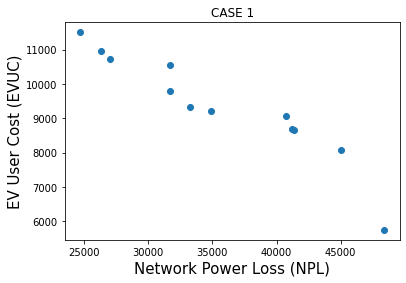

The optimal value is : [10728.328208892348, 27056.32087018682]
[117, 12, 116, 82, 95, 113]


In [34]:

import matplotlib.pyplot as plt
import math

def f1(x,zdata,xylis,df3):
    s = 0
    
    
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    return s

def f2(x,zdata,xylis,df3):
    
   
    nploss=0
    df5 = df3.lines_t
    for i in range(186):
        nploss+=(df5.p0.iloc[0][i]+df5.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))  
    return abs(nploss*87.7)

problem = Problem(num_of_variables=6, objectives=[f1, f2], variables_range=[(1, 118)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
evol = evo.evolve()
func = [i.objectives for i in evol]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.title("CASE 1")
plt.xlabel('Network Power Loss (NPL)', fontsize=15)
plt.ylabel('EV User Cost (EVUC)', fontsize=15)
plt.scatter(function2, function1)
plt.show()

treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)
feat=[i.features for i in evol]
for i in range(len(func)):
    if minimaxval[0]==func[i][0]:
        final_placement=feat[i]
        print(final_placement)
        break


In [33]:
def f2(x):
    xylis=[]
    print(x)
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    print(xylis)
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=1-mini
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev


mvd=f2(final_placement)
print(mvd,minimaxval)

[99, 91, 12, 81, 81, 98]
[[11, 2], [10, 2], [2, 7], [9, 2], [9, 2], [11, 3]]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.085049 seconds


0.004547849075880239 [10344.262512663248, 33780.90065213057]


In [37]:
for i in range(1,7):
    network.remove("Load","Load No {}".format(i)) 

[30, 99, 62, 34, 79, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.062865 seconds


[12, 44, 93, 77, 49, 91]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.076795 seconds


[8, 101, 27, 103, 38, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047093 seconds


[4, 83, 84, 29, 28, 104]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055885 seconds


[74, 118, 107, 16, 17, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053021 seconds


[96, 99, 29, 74, 104, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042495 seconds


[27, 15, 58, 89, 76, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049978 seconds


[28, 18, 5, 61, 46, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054891 seconds


[14, 80, 58, 86, 87, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042918 seconds


[60, 100, 6, 12, 17, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.038945 seconds


[114, 48, 24, 23, 76, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060870 seconds


[115, 27, 93, 10, 82, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041199 seconds


[37, 20, 40, 114, 52, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040451 seconds


[17, 48, 97, 89, 42, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds


[115, 100, 103, 44, 81, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048067 seconds


[49, 31, 109, 40, 67, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048407 seconds


[9, 4, 49, 66, 5, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058843 seconds


[55, 51, 7, 13, 16, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049699 seconds


[95, 35, 78, 116, 27, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.038898 seconds


[26, 34, 2, 45, 49, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048951 seconds


[77, 17, 1, 66, 13, 56]
[76, 63, 106, 98, 108, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056850 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045160 seconds


[41, 34, 68, 118, 37, 79]
[1, 67, 5, 6, 62, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048943 seconds


[75, 62, 107, 90, 86, 30]
[97, 49, 64, 45, 65, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049005 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043330 seconds


[5, 20, 98, 90, 72, 46]
[37, 101, 99, 25, 30, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048008 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050043 seconds


[111, 117, 19, 99, 77, 1]
[55, 11, 107, 111, 8, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046957 seconds


[46, 16, 100, 105, 22, 28]
[113, 42, 16, 15, 99, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046011 seconds


[41, 39, 114, 10, 44, 75]
[38, 92, 32, 18, 117, 56]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


[61, 21, 44, 14, 98, 75]
[97, 63, 56, 4, 13, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051947 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050963 seconds


[76, 60, 7, 52, 58, 5]
[5, 99, 38, 89, 93, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.085970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047068 seconds


[64, 77, 51, 49, 100, 26]
[52, 99, 86, 24, 110, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045215 seconds


[25, 36, 34, 108, 98, 96]
[93, 118, 69, 97, 61, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040050 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042995 seconds


[40, 25, 3, 28, 26, 70]
[78, 116, 95, 16, 93, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051995 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[44, 98, 89, 48, 31, 95]
[44, 92, 94, 91, 107, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052897 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049007 seconds


[67, 30, 59, 97, 22, 33]
[39, 102, 59, 61, 5, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052161 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044004 seconds


[28, 108, 3, 7, 70, 77]
[104, 81, 34, 83, 9, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds


[90, 68, 29, 65, 61, 8]
[57, 24, 27, 35, 71, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055852 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050096 seconds


[16, 49, 114, 17, 79, 89]
[56, 38, 22, 105, 10, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052906 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046968 seconds


[62, 118, 50, 37, 49, 63]
[102, 23, 70, 33, 35, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.062832 seconds


[39, 19, 31, 40, 69, 1]
[40, 66, 67, 34, 55, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046129 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.038966 seconds


[3, 39, 67, 52, 114, 21]
[97, 40, 43, 99, 63, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.065210 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040996 seconds


[63, 38, 19, 56, 57, 42]
[28, 89, 104, 63, 6, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043154 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048955 seconds


[102, 111, 26, 65, 95, 14]
[36, 23, 116, 52, 62, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048007 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039044 seconds


[44, 117, 5, 110, 49, 6]
[3, 4, 88, 47, 107, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039071 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[18, 8, 55, 117, 20, 44]
[44, 79, 111, 71, 80, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047011 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050020 seconds


[23, 34, 41, 98, 20, 105]
[49, 34, 32, 58, 41, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051021 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047157 seconds


[14, 66, 25, 28, 98, 9]
[56, 102, 45, 90, 46, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044009 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042016 seconds


[10, 23, 53, 55, 80, 107]
[74, 15, 107, 58, 20, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041038 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048055 seconds


[80, 31, 65, 14, 40, 43]
[18, 100, 98, 117, 42, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048025 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049980 seconds


[51, 30, 35, 17, 80, 33]
[110, 113, 60, 100, 94, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048090 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045045 seconds


[43, 37, 75, 8, 72, 26]
[39, 49, 54, 18, 6, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041991 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044369 seconds


[69, 22, 1, 21, 87, 52]
[75, 101, 31, 87, 66, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.084942 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049041 seconds


[49, 44, 68, 22, 52, 58]
[41, 82, 28, 44, 55, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052858 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045974 seconds


[91, 110, 13, 89, 106, 16]
[105, 53, 106, 83, 44, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041056 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043077 seconds


[48, 27, 45, 107, 59, 83]
[46, 74, 44, 38, 81, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051037 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057879 seconds


[63, 12, 78, 77, 40, 57]
[103, 102, 92, 21, 28, 56]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041682 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042945 seconds


[94, 27, 113, 75, 106, 61]
[27, 62, 40, 45, 66, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040021 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046115 seconds


[43, 28, 67, 76, 104, 2]
[107, 6, 27, 50, 28, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040998 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044066 seconds


[5, 55, 75, 50, 11, 95]
[96, 76, 99, 71, 5, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047346 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048992 seconds


[48, 94, 96, 49, 99, 100]
[113, 66, 32, 96, 3, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053820 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047018 seconds


[47, 52, 16, 35, 38, 50]
[99, 66, 117, 3, 54, 56]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045246 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045857 seconds


[22, 65, 19, 94, 75, 110]
[65, 58, 34, 5, 95, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058878 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[114, 85, 21, 20, 44, 41]
[80, 86, 113, 3, 7, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048996 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053022 seconds


[116, 1, 78, 55, 115, 82]
[9, 115, 70, 52, 45, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054852 seconds


[40, 106, 96, 32, 3, 94]
[67, 83, 81, 93, 84, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050018 seconds


[53, 76, 108, 40, 7, 23]
[6, 110, 29, 7, 73, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051862 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099948 seconds


[63, 23, 70, 26, 62, 6]
[38, 114, 40, 94, 98, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042963 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079961 seconds


[40, 69, 92, 38, 43, 62]
[17, 15, 89, 10, 71, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.084891 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050045 seconds


[87, 52, 64, 56, 30, 72]
[29, 26, 117, 16, 34, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049044 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045959 seconds


[1, 85, 65, 108, 77, 35]
[110, 40, 56, 2, 77, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041007 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039053 seconds


[92, 89, 10, 2, 77, 112]
[22, 78, 9, 6, 117, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047635 seconds


[11, 14, 71, 92, 96, 62]
[8, 72, 91, 73, 38, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041015 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042058 seconds


[17, 36, 85, 5, 11, 92]
[36, 94, 23, 69, 4, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042987 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042807 seconds


[24, 97, 96, 88, 100, 80]
[76, 37, 43, 115, 49, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048695 seconds


[111, 107, 4, 95, 70, 68]
[63, 55, 85, 23, 73, 95]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045026 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049979 seconds


[36, 15, 45, 27, 26, 102]
[25, 64, 105, 80, 71, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047113 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042011 seconds


[92, 14, 74, 48, 90, 71]
[52, 55, 39, 98, 97, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045046 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040104 seconds


[61, 96, 97, 92, 1, 107]
[83, 93, 86, 87, 21, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050009 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047114 seconds


[57, 43, 46, 59, 61, 55]
[92, 3, 19, 110, 65, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046068 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053881 seconds


[83, 84, 7, 85, 56, 65]
[98, 6, 92, 23, 70, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046382 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047990 seconds


[47, 24, 40, 79, 85, 74]
[101, 14, 116, 112, 6, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042006 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046001 seconds


[80, 67, 87, 97, 22, 110]
[9, 67, 89, 106, 7, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043052 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049003 seconds


[3, 88, 41, 83, 22, 29]
[22, 10, 46, 66, 114, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047043 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044023 seconds


[29, 112, 41, 25, 4, 59]
[109, 113, 100, 4, 2, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043069 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050037 seconds


[18, 76, 34, 55, 22, 8]
[54, 49, 97, 34, 37, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042046 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039052 seconds


[26, 74, 75, 24, 81, 110]
[24, 104, 80, 112, 99, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043020 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045034 seconds


[68, 91, 109, 20, 56, 34]
[7, 30, 85, 102, 65, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.065861 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047976 seconds


[86, 51, 101, 44, 93, 55]
[58, 12, 31, 108, 46, 113]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044451 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds


[24, 17, 78, 29, 85, 91]
[27, 83, 33, 29, 51, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045033 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049421 seconds


[58, 45, 62, 55, 70, 27]
[31, 55, 34, 103, 35, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051080 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059994 seconds


[79, 104, 103, 98, 51, 26]
[87, 104, 58, 91, 22, 113]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.031970 seconds


[95, 39, 92, 28, 32, 30]
[21, 79, 69, 9, 70, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041039 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048018 seconds


[53, 78, 84, 27, 61, 43]
[33, 92, 102, 112, 37, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044043 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048033 seconds


[112, 70, 28, 35, 59, 89]
[41, 47, 87, 107, 23, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052859 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044022 seconds


[112, 106, 50, 81, 111, 54]
[11, 34, 95, 28, 45, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041957 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.036033 seconds


[49, 30, 105, 15, 80, 78]
[29, 113, 64, 12, 91, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048079 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047985 seconds


[1, 30, 5, 18, 114, 76]
[36, 81, 42, 26, 106, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041043 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049959 seconds


[104, 82, 86, 57, 15, 5]
[24, 60, 17, 112, 40, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.041929 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059928 seconds


[64, 54, 71, 34, 69, 62]
[88, 51, 100, 109, 12, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069963 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.065822 seconds


[107, 62, 49, 53, 56, 54]
[59, 18, 57, 117, 97, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047429 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044070 seconds


[62, 16, 83, 27, 4, 12]
[22, 12, 61, 37, 11, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043007 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043032 seconds


[104, 37, 103, 67, 11, 70]
[108, 90, 10, 85, 31, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056847 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044978 seconds


[42, 6, 13, 116, 51, 103]
[102, 73, 69, 4, 74, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055815 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047004 seconds


[36, 82, 70, 32, 31, 80]
[8, 26, 66, 13, 78, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048923 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050917 seconds


[110, 54, 86, 66, 103, 58]
[74, 42, 73, 15, 27, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.067858 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.067945 seconds


[67, 20, 25, 99, 111, 90]
[57, 104, 86, 93, 111, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.073884 seconds


[31, 21, 97, 37, 81, 7]
[55, 75, 93, 26, 82, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039980 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046001 seconds


[15, 49, 43, 8, 117, 16]
[29, 23, 28, 7, 12, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048199 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049028 seconds


[16, 22, 10, 34, 67, 9]
[109, 107, 50, 49, 46, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039082 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds


[89, 105, 97, 87, 21, 39]
[47, 16, 28, 118, 39, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048019 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047656 seconds


[73, 57, 68, 7, 38, 27]
[1, 9, 45, 75, 16, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.081787 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052992 seconds


[65, 46, 103, 104, 1, 112]
[6, 102, 28, 117, 23, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050011 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.043072 seconds


[79, 26, 87, 44, 110, 53]
[37, 53, 41, 105, 97, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043659 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047008 seconds


[103, 93, 72, 18, 86, 35]
[97, 104, 92, 74, 79, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053911 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055537 seconds


[39, 113, 90, 109, 34, 75]
[10, 74, 36, 96, 45, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050015 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.115122 seconds


[31, 53, 58, 109, 27, 73]
[2, 14, 59, 104, 92, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058842 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045878 seconds


[11, 76, 13, 89, 68, 117]
[93, 52, 30, 24, 64, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.191488 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039977 seconds


[46, 80, 44, 95, 36, 103]
[68, 116, 5, 1, 17, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.111925 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.111924 seconds


[41, 110, 109, 38, 23, 57]
[20, 89, 117, 28, 60, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.103931 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.079946 seconds


[113, 68, 61, 115, 3, 118]
[76, 111, 37, 13, 66, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095935 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.055967 seconds


[10, 26, 48, 35, 11, 112]
[54, 106, 29, 38, 74, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.103930 seconds


[115, 113, 50, 84, 59, 14]
[88, 95, 46, 51, 56, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.127916 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.167887 seconds


[18, 78, 116, 76, 21, 44]
[4, 26, 96, 76, 87, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109940 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095935 seconds


[60, 4, 89, 41, 58, 92]
[97, 77, 59, 67, 22, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109942 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109943 seconds


[26, 68, 118, 70, 60, 112]
[9, 92, 68, 94, 52, 113]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.119937 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109941 seconds


[78, 66, 86, 108, 39, 90]
[40, 76, 67, 2, 106, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109942 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089937 seconds


[75, 31, 92, 83, 86, 47]
[39, 50, 67, 65, 1, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079990 seconds


[43, 83, 92, 24, 49, 45]
[94, 15, 97, 90, 110, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069158 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[107, 115, 79, 55, 14, 38]
[32, 78, 8, 101, 44, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063999 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.086014 seconds


[112, 98, 45, 56, 64, 38]
[13, 110, 32, 19, 46, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089954 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050039 seconds


[8, 11, 35, 44, 59, 102]
[70, 92, 42, 58, 47, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046053 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063949 seconds


[46, 1, 5, 60, 18, 22]
[13, 56, 59, 28, 82, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063961 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071953 seconds


[48, 98, 4, 115, 97, 114]
[62, 90, 104, 59, 18, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058061 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059210 seconds


[40, 44, 19, 90, 102, 13]
[8, 74, 64, 60, 58, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079955 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[71, 40, 58, 19, 48, 16]
[3, 87, 74, 34, 73, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056010 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055965 seconds


[50, 32, 81, 59, 3, 4]
[52, 104, 18, 84, 25, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040022 seconds


[36, 64, 82, 33, 65, 102]
[52, 90, 116, 16, 72, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[11, 82, 27, 74, 51, 3]
[26, 76, 77, 37, 72, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056735 seconds


[57, 47, 98, 99, 45, 35]
[45, 55, 86, 71, 104, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047875 seconds


[31, 51, 41, 77, 68, 10]
[50, 62, 31, 86, 57, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.059965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[43, 22, 42, 27, 24, 79]
[31, 48, 65, 97, 50, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039983 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029981 seconds


[101, 17, 35, 98, 89, 66]
[58, 50, 29, 47, 93, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[73, 43, 99, 18, 77, 55]
[109, 104, 102, 43, 25, 87]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049940 seconds


[17, 33, 77, 57, 46, 108]
[17, 113, 53, 102, 34, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[108, 111, 104, 6, 117, 28]
[79, 89, 24, 64, 104, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[69, 40, 21, 81, 85, 29]
[117, 46, 118, 6, 36, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.050015 seconds


[85, 90, 10, 16, 56, 104]
[112, 87, 97, 15, 28, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[63, 74, 15, 79, 46, 6]
[10, 35, 60, 64, 58, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.042325 seconds


[10, 116, 62, 110, 35, 18]
[92, 94, 68, 69, 2, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059967 seconds


[118, 45, 101, 52, 17, 79]
[55, 86, 49, 38, 26, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059930 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[39, 21, 83, 10, 113, 78]
[30, 13, 63, 1, 64, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049938 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[40, 48, 6, 65, 66, 45]
[48, 60, 52, 115, 81, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049982 seconds


[39, 113, 71, 51, 42, 58]
[60, 112, 102, 82, 24, 40]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058472 seconds


[106, 11, 58, 83, 52, 113]
[5, 51, 75, 30, 16, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058571 seconds


[50, 55, 104, 100, 78, 103]
[102, 108, 1, 35, 61, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059927 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039946 seconds


[82, 73, 88, 90, 102, 62]
[68, 17, 76, 59, 37, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040016 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029983 seconds


[105, 86, 53, 78, 2, 69]
[97, 100, 71, 43, 17, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050011 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059964 seconds


[69, 41, 65, 3, 55, 11]
[81, 72, 100, 51, 36, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds


[8, 74, 71, 94, 78, 14]
[52, 66, 112, 10, 96, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[21, 42, 77, 63, 41, 86]
[41, 108, 87, 103, 43, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds


[48, 25, 98, 15, 71, 104]
[92, 14, 106, 4, 47, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds


[100, 89, 5, 23, 88, 39]
[77, 13, 69, 96, 91, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060008 seconds


[76, 31, 12, 8, 22, 63]
[60, 62, 44, 105, 83, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029988 seconds


[84, 41, 65, 108, 100, 19]
[113, 103, 94, 31, 108, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039978 seconds


[36, 113, 75, 95, 114, 101]
[59, 25, 34, 115, 77, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds


[23, 68, 35, 7, 45, 111]
[15, 72, 52, 8, 31, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.029946 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[114, 31, 94, 70, 92, 13]
[75, 38, 113, 7, 42, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060509 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039929 seconds


[62, 53, 115, 50, 69, 67]
[65, 82, 103, 12, 14, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[21, 59, 71, 97, 100, 82]
[81, 49, 99, 88, 4, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054388 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[74, 19, 3, 30, 59, 82]
[52, 46, 114, 91, 80, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.066462 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[12, 6, 113, 117, 38, 75]
[70, 49, 101, 78, 72, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048419 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[38, 36, 116, 59, 102, 34]
[76, 35, 96, 95, 64, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.045129 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049940 seconds


[32, 16, 104, 111, 114, 65]
[13, 71, 104, 76, 81, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058730 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039983 seconds


[55, 95, 50, 22, 113, 63]
[11, 55, 20, 16, 36, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049442 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


[78, 51, 108, 74, 100, 106]
[92, 17, 58, 68, 63, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039980 seconds


[84, 29, 104, 76, 91, 40]
[34, 61, 79, 42, 106, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039983 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039940 seconds


[54, 35, 22, 10, 40, 118]
[60, 89, 25, 78, 49, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040020 seconds


[44, 15, 94, 83, 52, 41]
[54, 42, 19, 3, 108, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060016 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[101, 81, 109, 31, 6, 102]
[3, 93, 46, 98, 4, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030023 seconds


[55, 31, 19, 33, 34, 30]
[17, 19, 54, 107, 38, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049935 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049936 seconds


[7, 44, 19, 65, 41, 90]
[67, 55, 9, 54, 105, 40]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038259 seconds


[21, 82, 42, 47, 96, 4]
[74, 54, 61, 87, 47, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029990 seconds


[31, 59, 14, 5, 35, 28]
[1, 63, 72, 92, 61, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044592 seconds


[23, 108, 32, 111, 8, 5]
[47, 70, 106, 58, 39, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060000 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039941 seconds


[29, 48, 60, 52, 85, 39]
[116, 4, 83, 55, 22, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050017 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039154 seconds


[56, 40, 86, 118, 30, 77]
[79, 47, 64, 12, 101, 40]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049934 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039944 seconds


[72, 13, 102, 7, 27, 62]
[103, 71, 16, 86, 61, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039980 seconds


[1, 55, 25, 8, 28, 34]
[45, 56, 108, 49, 105, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049930 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039940 seconds


[7, 60, 55, 72, 53, 96]
[17, 100, 58, 20, 9, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069964 seconds


[71, 13, 43, 102, 31, 107]
[22, 94, 74, 85, 32, 3]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040018 seconds


[44, 49, 57, 18, 36, 78]
[112, 25, 19, 5, 37, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039940 seconds


[59, 77, 87, 51, 83, 25]
[92, 117, 36, 47, 14, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060695 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060004 seconds


[51, 85, 71, 47, 55, 26]
[74, 34, 85, 67, 23, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050106 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039939 seconds


[67, 26, 101, 75, 69, 31]
[49, 94, 22, 44, 62, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029951 seconds


[88, 12, 24, 61, 25, 93]
[45, 59, 15, 24, 76, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050009 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040015 seconds


[115, 108, 102, 37, 86, 63]
[23, 101, 38, 57, 41, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039941 seconds


[62, 99, 29, 115, 106, 19]
[34, 23, 102, 9, 21, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039939 seconds


[19, 118, 24, 84, 66, 30]
[79, 86, 3, 83, 106, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[14, 65, 76, 67, 11, 77]
[60, 42, 56, 84, 30, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049971 seconds


[96, 60, 12, 95, 67, 24]
[26, 37, 87, 85, 47, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049941 seconds


[40, 24, 76, 93, 45, 56]
[27, 56, 39, 92, 30, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[68, 61, 5, 102, 113, 29]
[23, 85, 109, 76, 73, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049938 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039976 seconds


[48, 3, 51, 101, 8, 100]
[102, 103, 27, 118, 101, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049942 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049935 seconds


[105, 35, 17, 81, 115, 19]
[107, 10, 95, 96, 56, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029984 seconds


[73, 114, 70, 78, 113, 111]
[57, 110, 87, 2, 37, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050569 seconds


[53, 59, 43, 55, 29, 33]
[64, 28, 47, 53, 35, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039941 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056530 seconds


[20, 81, 115, 35, 98, 22]
[95, 13, 40, 31, 53, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039943 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds


[39, 84, 76, 82, 43, 79]
[111, 83, 16, 94, 63, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050011 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056406 seconds


[41, 56, 40, 78, 117, 42]
[78, 10, 85, 50, 43, 87]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049934 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079955 seconds


[74, 69, 98, 43, 78, 45]
[60, 73, 35, 33, 99, 101]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029952 seconds


[112, 77, 86, 49, 99, 61]
[89, 77, 46, 99, 115, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039941 seconds


[35, 48, 28, 15, 107, 50]
[16, 103, 109, 65, 40, 14]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056475 seconds


[22, 17, 18, 16, 69, 104]
[111, 40, 31, 85, 17, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049938 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046509 seconds


[18, 81, 52, 11, 35, 44]
[90, 109, 117, 24, 101, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056581 seconds


[36, 115, 114, 113, 117, 82]
[103, 71, 76, 41, 32, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053610 seconds


[65, 59, 84, 24, 78, 56]
[1, 40, 73, 96, 78, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049114 seconds


[77, 81, 84, 106, 43, 45]
[85, 109, 43, 98, 36, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051830 seconds


[117, 72, 69, 58, 65, 8]
[102, 32, 11, 22, 80, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050012 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039946 seconds


[71, 41, 92, 83, 78, 36]
[78, 12, 27, 26, 64, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[103, 31, 47, 75, 67, 102]
[8, 81, 5, 54, 89, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.050005 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.059964 seconds


[93, 117, 50, 26, 103, 7]
[47, 100, 67, 41, 43, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049972 seconds


[23, 36, 118, 100, 1, 56]
[54, 18, 28, 22, 59, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069959 seconds


[65, 75, 105, 24, 21, 88]
[29, 66, 26, 99, 81, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030020 seconds


[59, 48, 51, 53, 5, 1]
[58, 107, 46, 98, 26, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds


[52, 111, 22, 85, 49, 97]
[96, 83, 7, 58, 50, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050007 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds


[24, 12, 71, 98, 97, 112]
[63, 25, 19, 2, 1, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049942 seconds


[67, 59, 2, 112, 63, 83]
[82, 87, 110, 24, 91, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[98, 45, 65, 71, 38, 37]
[116, 10, 54, 78, 55, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089948 seconds


[116, 69, 71, 67, 56, 16]
[47, 104, 32, 29, 112, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099945 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079955 seconds


[23, 41, 89, 29, 84, 62]
[17, 81, 92, 115, 61, 47]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040015 seconds


[21, 67, 56, 89, 77, 71]
[9, 13, 63, 106, 36, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058475 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050018 seconds


[93, 84, 23, 22, 1, 50]
[116, 50, 108, 78, 44, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds


[6, 4, 50, 51, 80, 103]
[76, 14, 93, 49, 47, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039975 seconds


[74, 75, 101, 112, 102, 49]
[73, 116, 59, 115, 18, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds


[78, 112, 14, 48, 94, 85]
[109, 107, 55, 64, 50, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050013 seconds


[61, 62, 103, 31, 6, 22]
[15, 41, 115, 64, 92, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029985 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[87, 23, 71, 5, 79, 48]
[93, 30, 15, 90, 33, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049943 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds


[73, 104, 67, 11, 81, 83]
[61, 40, 39, 12, 89, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[80, 89, 48, 54, 106, 5]
[72, 86, 30, 75, 3, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049937 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050014 seconds


[88, 97, 101, 13, 15, 84]
[20, 48, 28, 39, 2, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[58, 79, 114, 83, 31, 4]
[60, 22, 73, 78, 81, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050004 seconds


[109, 20, 7, 31, 47, 33]
[107, 51, 48, 4, 84, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040490 seconds


[116, 58, 90, 38, 9, 85]
[56, 59, 28, 68, 45, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.046582 seconds


[93, 25, 9, 99, 17, 105]
[49, 101, 73, 12, 58, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[112, 54, 73, 16, 4, 23]
[47, 4, 98, 61, 84, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039947 seconds


[74, 113, 104, 98, 22, 34]
[2, 38, 93, 102, 70, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039942 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.033954 seconds


[90, 82, 3, 58, 36, 107]
[110, 42, 4, 49, 102, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037885 seconds


[98, 81, 35, 28, 24, 8]
[57, 50, 48, 27, 41, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049969 seconds


[102, 44, 39, 14, 107, 12]
[72, 43, 29, 26, 47, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059937 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds


[72, 59, 73, 30, 118, 62]
[6, 64, 25, 95, 24, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050025 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049938 seconds


[80, 95, 25, 118, 30, 116]
[37, 109, 115, 94, 11, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[7, 31, 57, 100, 51, 92]
[52, 39, 64, 59, 71, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[35, 38, 92, 30, 48, 58]
[101, 75, 33, 118, 57, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds


[52, 101, 35, 10, 90, 29]
[66, 83, 14, 37, 56, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039981 seconds


[7, 25, 45, 87, 54, 4]
[9, 101, 27, 54, 69, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049940 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[44, 65, 70, 40, 59, 18]
[114, 93, 29, 69, 46, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039943 seconds


[118, 96, 61, 114, 90, 94]
[9, 101, 86, 53, 70, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029982 seconds


[101, 69, 52, 21, 92, 22]
[40, 7, 82, 93, 36, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds


[28, 72, 73, 75, 107, 100]
[41, 107, 8, 67, 96, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039938 seconds


[58, 45, 108, 84, 46, 71]
[30, 48, 103, 84, 111, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039977 seconds


[33, 113, 21, 47, 79, 57]
[70, 118, 41, 83, 32, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[113, 47, 93, 96, 86, 32]
[45, 73, 43, 50, 75, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059933 seconds


[80, 102, 52, 84, 77, 85]
[80, 20, 112, 99, 23, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.046776 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039981 seconds


[18, 75, 43, 86, 102, 48]
[61, 23, 38, 3, 7, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040013 seconds


[42, 5, 40, 92, 66, 45]
[55, 41, 32, 29, 19, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050498 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds


[51, 53, 25, 19, 2, 82]
[51, 50, 95, 72, 7, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.034187 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029987 seconds


[92, 51, 84, 108, 40, 91]
[77, 35, 95, 52, 55, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043624 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039948 seconds


[118, 13, 109, 10, 44, 17]
[73, 115, 5, 106, 50, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[113, 79, 95, 110, 34, 62]
[75, 7, 88, 32, 21, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050009 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.042193 seconds


[93, 15, 2, 105, 54, 116]
[117, 88, 44, 99, 49, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069923 seconds


[84, 61, 66, 118, 22, 94]
[15, 58, 67, 103, 31, 47]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049934 seconds


[49, 88, 110, 71, 44, 101]
[80, 67, 62, 96, 2, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059937 seconds


[90, 12, 51, 28, 20, 46]
[56, 9, 8, 35, 84, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[63, 59, 118, 72, 24, 19]
[113, 22, 35, 27, 64, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[2, 43, 71, 63, 102, 87]
[20, 85, 46, 81, 96, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029982 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039976 seconds


[87, 40, 86, 31, 63, 7]
[92, 62, 114, 58, 75, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040018 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds


[3, 40, 113, 81, 22, 10]
[60, 80, 26, 106, 11, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050013 seconds


[48, 67, 75, 41, 100, 57]
[2, 59, 96, 21, 97, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040015 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds


[118, 101, 35, 106, 108, 43]
[29, 77, 98, 42, 99, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040010 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050006 seconds


[25, 15, 105, 42, 96, 83]
[77, 86, 82, 28, 44, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059330 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039939 seconds


[6, 111, 94, 79, 110, 81]
[40, 62, 81, 58, 2, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039941 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049936 seconds


[106, 81, 116, 31, 75, 102]
[13, 82, 114, 100, 70, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050014 seconds


[82, 50, 19, 95, 67, 33]
[64, 99, 95, 60, 63, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039983 seconds


[79, 100, 63, 72, 6, 54]
[92, 31, 59, 13, 11, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039974 seconds


[12, 40, 36, 5, 108, 33]
[116, 59, 17, 109, 42, 104]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060003 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.044756 seconds


[92, 3, 34, 36, 90, 100]
[96, 112, 110, 14, 10, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039981 seconds


[9, 101, 98, 42, 115, 58]
[78, 76, 48, 96, 2, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039975 seconds


[14, 32, 73, 57, 12, 54]
[106, 15, 65, 56, 89, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039979 seconds


[51, 37, 97, 66, 61, 43]
[58, 40, 50, 51, 44, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039980 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053028 seconds


[89, 65, 53, 43, 61, 28]
[110, 7, 9, 14, 90, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050009 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049023 seconds


[40, 51, 104, 72, 2, 57]
[32, 92, 47, 111, 14, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037084 seconds


[107, 102, 109, 42, 78, 26]
[98, 116, 90, 24, 107, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050011 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039977 seconds


[44, 22, 116, 86, 47, 19]
[93, 95, 98, 58, 88, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049973 seconds


[36, 4, 73, 103, 113, 25]
[64, 19, 89, 23, 68, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039976 seconds


[24, 35, 82, 49, 70, 23]
[82, 37, 105, 23, 113, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds


[63, 105, 88, 49, 106, 5]
[111, 102, 44, 75, 34, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[58, 69, 40, 98, 80, 39]
[41, 21, 4, 60, 50, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049931 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039978 seconds


[12, 98, 54, 107, 8, 22]
[89, 97, 54, 85, 61, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029987 seconds


[104, 111, 76, 79, 10, 105]
[116, 33, 115, 6, 95, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds


[116, 104, 57, 88, 79, 43]
[43, 96, 53, 27, 8, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049942 seconds


[27, 10, 23, 49, 43, 76]
[101, 102, 43, 42, 118, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040016 seconds


[49, 37, 28, 4, 65, 62]
[115, 107, 84, 85, 109, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039943 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[11, 82, 72, 102, 117, 20]
[79, 100, 81, 51, 46, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049933 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030020 seconds


[31, 6, 40, 99, 64, 111]
[62, 63, 14, 76, 25, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039939 seconds


[78, 109, 102, 74, 98, 12]
[96, 19, 108, 15, 38, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039981 seconds


[7, 46, 37, 84, 80, 33]
[3, 39, 87, 89, 109, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds


[59, 18, 52, 23, 48, 2]
[38, 103, 29, 112, 89, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049926 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049939 seconds


[75, 95, 103, 34, 71, 12]
[75, 22, 19, 44, 56, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[111, 80, 86, 85, 25, 27]
[96, 48, 64, 110, 32, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039945 seconds


[17, 4, 12, 43, 64, 102]
[5, 115, 25, 40, 19, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.050009 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.059968 seconds


[109, 67, 3, 114, 54, 27]
[66, 52, 100, 112, 49, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040016 seconds


[93, 102, 79, 8, 61, 116]
[10, 84, 71, 36, 55, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039976 seconds


[105, 40, 5, 98, 92, 90]
[34, 88, 45, 82, 95, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039975 seconds


[29, 68, 45, 117, 109, 107]
[107, 2, 114, 99, 47, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029949 seconds


[28, 9, 72, 5, 98, 45]
[54, 14, 95, 55, 68, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039947 seconds


[112, 72, 79, 103, 71, 42]
[10, 91, 16, 11, 20, 61]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059960 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[16, 28, 80, 94, 55, 76]
[43, 21, 6, 106, 115, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049964 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[74, 19, 43, 75, 87, 84]
[81, 28, 39, 69, 16, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039936 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[94, 5, 1, 74, 59, 31]
[118, 83, 92, 33, 115, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048469 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039943 seconds


[109, 36, 98, 58, 68, 51]
[47, 34, 59, 11, 72, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.041450 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039943 seconds


[8, 32, 65, 115, 103, 47]
[90, 44, 109, 95, 23, 87]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058564 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029984 seconds


[81, 82, 55, 21, 14, 94]
[6, 64, 52, 94, 86, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047933 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039947 seconds


[69, 96, 27, 71, 12, 39]
[72, 64, 38, 24, 87, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039943 seconds


[23, 79, 97, 92, 8, 105]
[78, 29, 101, 52, 107, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049942 seconds


[10, 31, 28, 17, 71, 57]
[17, 50, 3, 106, 25, 40]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.129929 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079956 seconds


[63, 73, 107, 79, 103, 82]
[13, 62, 8, 47, 21, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.055964 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.119920 seconds


[10, 53, 22, 51, 108, 58]
[48, 62, 26, 84, 74, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.103932 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.065864 seconds


[65, 113, 43, 9, 98, 80]
[54, 80, 15, 51, 115, 108]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.087941 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.059965 seconds


[97, 66, 79, 1, 80, 20]
[64, 117, 94, 115, 86, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079957 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079957 seconds


[27, 77, 28, 37, 20, 108]
[30, 59, 106, 69, 12, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.059967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.051212 seconds


[42, 95, 37, 57, 25, 45]
[53, 101, 106, 21, 61, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.071951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049972 seconds


[54, 81, 58, 1, 80, 41]
[40, 87, 50, 62, 8, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056003 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.066031 seconds


[65, 7, 96, 109, 61, 105]
[9, 59, 55, 43, 77, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071949 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029988 seconds


[37, 15, 92, 110, 26, 20]
[33, 53, 112, 90, 111, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.038704 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040011 seconds


[103, 101, 32, 19, 110, 7]
[74, 3, 5, 49, 25, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040898 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.044242 seconds


[90, 82, 112, 32, 53, 2]
[13, 11, 9, 111, 76, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040005 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.063958 seconds


[63, 35, 52, 100, 58, 3]
[16, 1, 12, 15, 113, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063921 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079954 seconds


[7, 1, 16, 9, 34, 11]
[54, 90, 79, 43, 20, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054142 seconds


[31, 118, 36, 39, 112, 4]
[33, 41, 102, 35, 114, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.065839 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[2, 54, 37, 24, 104, 99]
[32, 97, 51, 19, 83, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.103041 seconds


[87, 96, 71, 62, 65, 108]
[109, 30, 58, 101, 81, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.093180 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040013 seconds


[24, 95, 71, 37, 38, 85]
[103, 102, 77, 53, 74, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055509 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.047963 seconds


[8, 32, 40, 22, 82, 80]
[9, 2, 75, 6, 3, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095933 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds


[38, 113, 57, 23, 7, 62]
[72, 52, 79, 116, 85, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039945 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.063957 seconds


[82, 10, 18, 54, 43, 100]
[80, 96, 40, 35, 106, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.055967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds


[16, 102, 101, 83, 23, 40]
[16, 8, 113, 65, 55, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063996 seconds


[70, 73, 16, 110, 102, 41]
[79, 48, 90, 113, 1, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040014 seconds


[15, 17, 93, 25, 20, 51]
[22, 87, 33, 113, 89, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.111817 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050012 seconds


[112, 19, 33, 95, 99, 35]
[40, 58, 109, 72, 63, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.072002 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.047972 seconds


[14, 81, 18, 79, 91, 65]
[71, 78, 73, 4, 114, 40]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039947 seconds


[32, 93, 116, 18, 110, 88]
[19, 2, 90, 50, 5, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040015 seconds


[35, 62, 32, 24, 7, 97]
[80, 70, 41, 93, 109, 104]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059970 seconds


[115, 8, 52, 111, 93, 13]
[91, 110, 79, 76, 61, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057795 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.077881 seconds


[60, 3, 100, 44, 43, 85]
[115, 109, 72, 64, 62, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095900 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039976 seconds


[34, 40, 2, 9, 64, 8]
[102, 68, 30, 105, 54, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[42, 76, 36, 27, 2, 80]
[69, 22, 103, 20, 68, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.046933 seconds


[38, 57, 58, 31, 96, 110]
[104, 91, 80, 35, 44, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052083 seconds


[81, 55, 1, 100, 40, 90]
[60, 99, 27, 55, 17, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045416 seconds


[86, 101, 4, 108, 90, 27]
[111, 43, 1, 3, 67, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048060 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.055962 seconds


[26, 80, 77, 50, 64, 31]
[74, 18, 100, 73, 23, 95]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060002 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[37, 84, 34, 3, 20, 96]
[8, 65, 103, 2, 91, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.114841 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039942 seconds


[111, 56, 73, 42, 112, 100]
[59, 5, 108, 94, 2, 40]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.087942 seconds


[24, 83, 73, 52, 63, 104]
[82, 72, 9, 12, 67, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.087972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.071951 seconds


[1, 51, 69, 29, 47, 2]
[29, 84, 48, 96, 21, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[71, 17, 48, 15, 58, 7]
[81, 111, 101, 113, 41, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.055923 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.048004 seconds


[94, 105, 8, 75, 62, 35]
[83, 115, 79, 11, 2, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040010 seconds


[113, 114, 58, 95, 28, 12]
[2, 40, 101, 64, 22, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[29, 45, 114, 118, 30, 9]
[91, 25, 52, 62, 20, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039947 seconds


[109, 117, 55, 76, 58, 101]
[87, 96, 7, 89, 10, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039942 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.059968 seconds


[65, 2, 77, 30, 67, 20]
[12, 40, 17, 109, 68, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079963 seconds


[113, 36, 30, 92, 11, 21]
[32, 10, 1, 23, 4, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049968 seconds


[62, 35, 33, 115, 91, 87]
[38, 53, 67, 111, 79, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089953 seconds


[96, 27, 103, 25, 98, 68]
[57, 41, 60, 79, 115, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds


[109, 93, 64, 18, 37, 102]
[83, 103, 70, 63, 113, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[8, 116, 73, 54, 106, 87]
[43, 67, 37, 106, 73, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039975 seconds


[79, 50, 89, 91, 34, 38]
[39, 40, 114, 21, 100, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039940 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.029954 seconds


[41, 19, 23, 43, 117, 87]
[97, 15, 7, 76, 85, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[54, 25, 104, 50, 115, 71]
[25, 51, 54, 61, 102, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039982 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[7, 84, 61, 80, 23, 90]
[113, 45, 15, 92, 10, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049940 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.050009 seconds


[8, 107, 37, 46, 20, 45]
[8, 30, 112, 57, 11, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039949 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059931 seconds


[66, 51, 20, 73, 41, 7]
[82, 16, 86, 106, 61, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.050010 seconds


[53, 49, 9, 27, 68, 40]
[58, 84, 112, 59, 44, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059932 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


[12, 53, 7, 44, 71, 34]
[79, 66, 102, 71, 28, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050020 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059937 seconds


[55, 104, 85, 38, 63, 37]
[27, 50, 99, 40, 73, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds


[55, 37, 101, 9, 41, 36]
[26, 68, 55, 77, 112, 47]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040009 seconds


[27, 32, 97, 87, 52, 3]
[82, 104, 79, 3, 80, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[98, 81, 24, 86, 95, 4]
[18, 105, 107, 96, 32, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[93, 64, 32, 97, 84, 79]
[99, 58, 67, 61, 70, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039983 seconds


[73, 113, 79, 58, 107, 69]
[41, 51, 48, 61, 26, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060003 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds


[84, 97, 76, 40, 23, 96]
[108, 118, 107, 38, 8, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds


[118, 17, 112, 40, 22, 53]
[32, 37, 98, 84, 17, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040019 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.050007 seconds


[54, 46, 9, 41, 5, 49]
[111, 98, 63, 89, 31, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039980 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[18, 74, 52, 98, 60, 113]
[56, 5, 37, 105, 11, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049936 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039983 seconds


[34, 39, 75, 70, 10, 5]
[44, 11, 37, 81, 24, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039946 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039940 seconds


[33, 105, 61, 44, 25, 96]
[54, 99, 13, 70, 31, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039983 seconds


[77, 59, 90, 57, 50, 15]
[61, 7, 59, 73, 51, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.042377 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049930 seconds


[10, 83, 3, 4, 35, 61]
[94, 32, 47, 67, 91, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050009 seconds


[90, 88, 113, 89, 41, 55]
[24, 79, 41, 31, 29, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049937 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049973 seconds


[40, 63, 83, 48, 95, 97]
[84, 102, 20, 44, 85, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050009 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049971 seconds


[102, 35, 31, 85, 64, 112]
[116, 86, 35, 66, 37, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds


[29, 4, 9, 92, 42, 41]
[57, 17, 10, 5, 100, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059932 seconds


[42, 84, 102, 55, 40, 43]
[57, 42, 108, 31, 7, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049937 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049969 seconds


[54, 114, 89, 101, 70, 43]
[61, 3, 86, 54, 66, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039934 seconds


[57, 89, 96, 35, 12, 50]
[75, 11, 49, 73, 112, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049973 seconds


[69, 51, 94, 45, 26, 6]
[85, 32, 115, 37, 66, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049928 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059931 seconds


[25, 72, 79, 71, 42, 95]
[10, 46, 34, 17, 68, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[106, 66, 25, 91, 105, 9]
[84, 23, 95, 86, 116, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060019 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[92, 27, 73, 113, 102, 37]
[45, 84, 82, 30, 66, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049940 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds


[111, 8, 34, 33, 96, 112]
[43, 113, 33, 82, 71, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049935 seconds


[88, 97, 8, 74, 42, 116]
[110, 42, 118, 32, 91, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030025 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.069959 seconds


[3, 27, 87, 114, 74, 6]
[38, 116, 71, 15, 27, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039980 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049976 seconds


[67, 71, 75, 39, 50, 17]
[48, 31, 73, 56, 76, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040015 seconds


[37, 75, 86, 71, 22, 78]
[46, 64, 45, 90, 8, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039983 seconds


[113, 102, 95, 36, 33, 48]
[80, 108, 115, 23, 42, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049935 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059931 seconds


[31, 54, 94, 108, 80, 10]
[39, 45, 95, 51, 8, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039976 seconds


[113, 51, 18, 96, 117, 41]
[51, 5, 103, 80, 89, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039980 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039942 seconds


[110, 42, 102, 66, 118, 18]
[50, 103, 105, 35, 82, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039973 seconds


[93, 11, 64, 73, 20, 23]
[41, 48, 65, 99, 69, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds


[97, 62, 55, 15, 46, 78]
[79, 60, 6, 9, 115, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039982 seconds


[5, 3, 46, 108, 11, 40]
[35, 15, 78, 59, 69, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049941 seconds


[11, 104, 62, 51, 60, 110]
[83, 82, 92, 2, 104, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.050010 seconds


[91, 67, 66, 106, 30, 37]
[68, 80, 5, 37, 45, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039981 seconds


[3, 109, 111, 8, 65, 86]
[86, 73, 19, 82, 65, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039941 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039980 seconds


[25, 85, 54, 28, 18, 14]
[7, 68, 71, 109, 116, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040015 seconds


[15, 69, 12, 53, 47, 62]
[41, 62, 77, 29, 66, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds


[95, 79, 75, 10, 49, 18]
[8, 66, 75, 40, 93, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040016 seconds


[4, 48, 34, 12, 82, 2]
[114, 7, 110, 94, 109, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039934 seconds


[68, 67, 58, 80, 72, 107]
[72, 26, 31, 10, 107, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039936 seconds


[48, 112, 74, 66, 50, 52]
[52, 79, 6, 67, 15, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds


[72, 104, 1, 30, 103, 4]
[106, 37, 30, 5, 25, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039979 seconds


[18, 8, 13, 23, 65, 98]
[88, 50, 34, 4, 72, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049974 seconds


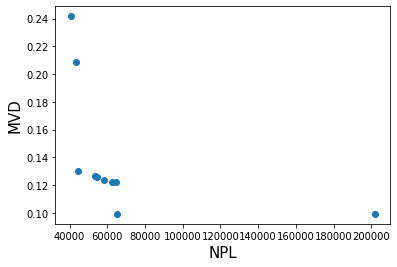

The optimal value is : [0.13045589326045048, 44207.17617959975]
[17, 7, 3, 1, 8, 5]


In [62]:

import matplotlib.pyplot as plt
import math

def f1(x,zdata,xylis,df3):
    
   
    df1=df3.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)
     
    return vdev*100
def f2(x,zdata,xylis,df3):
    
   
    df5 = df3.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df5.p0.iloc[0][i]+df5.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i)) 
    return abs(nploss*250.57)

problem = Problem(num_of_variables=6, objectives=[f1, f2], variables_range=[(1, 118)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
evol = evo.evolve()
func = [i.objectives for i in evol]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('NPL', fontsize=15)
plt.ylabel('MVD', fontsize=15)
plt.scatter(function2, function1)
plt.show()


treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)
feat=[i.features for i in evol]
for i in range(len(func)):
    if minimaxval[0]==func[i][0]:
        print(feat[i])


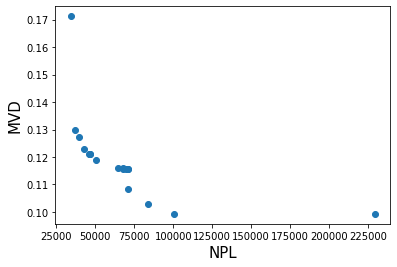

In [61]:
plt.xlabel('NPL', fontsize=15)
plt.ylabel('MVD', fontsize=15)
plt.scatter(function2, function1)
plt.show()


[62, 35, 76, 84, 73, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.093867 seconds


[28, 88, 41, 62, 40, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049940 seconds


[80, 91, 10, 39, 72, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds


[11, 18, 53, 65, 76, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049971 seconds


[16, 9, 35, 32, 57, 14]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079961 seconds


[43, 92, 25, 8, 54, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds


[52, 109, 2, 44, 78, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.087944 seconds


[49, 73, 4, 62, 115, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063993 seconds


[2, 105, 40, 16, 42, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055964 seconds


[66, 87, 92, 108, 3, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039979 seconds


[110, 75, 63, 78, 27, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063953 seconds


[67, 88, 28, 42, 111, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063963 seconds


[88, 85, 70, 32, 42, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056791 seconds


[86, 21, 63, 4, 13, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063993 seconds


[5, 3, 2, 74, 79, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079944 seconds


[5, 11, 16, 14, 61, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.047970 seconds


[34, 20, 74, 5, 27, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071948 seconds


[17, 24, 41, 68, 82, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071948 seconds


[65, 80, 24, 4, 101, 108]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.087939 seconds


[2, 85, 98, 60, 28, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.143911 seconds


[67, 31, 71, 87, 12, 80]
[43, 33, 62, 40, 79, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.167888 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095932 seconds


[6, 111, 97, 31, 65, 9]
[77, 45, 105, 98, 8, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055929 seconds


[117, 49, 98, 89, 86, 96]
[118, 38, 111, 108, 16, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056002 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039936 seconds


[74, 25, 105, 104, 24, 14]
[94, 49, 115, 66, 64, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049979 seconds


[53, 116, 64, 4, 51, 25]
[112, 87, 21, 85, 11, 101]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050018 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds


[90, 48, 76, 114, 23, 28]
[57, 12, 2, 92, 25, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059929 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049978 seconds


[68, 42, 77, 2, 94, 56]
[3, 82, 92, 1, 60, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059925 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds


[67, 5, 47, 70, 113, 45]
[91, 43, 66, 61, 42, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055748 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040016 seconds


[69, 36, 28, 51, 41, 86]
[84, 116, 88, 47, 104, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069059 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[36, 97, 45, 50, 108, 82]
[57, 72, 113, 112, 66, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040016 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049940 seconds


[87, 27, 100, 26, 4, 70]
[25, 3, 20, 61, 6, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049930 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050020 seconds


[32, 66, 22, 91, 92, 89]
[7, 91, 32, 55, 15, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069967 seconds


[2, 52, 56, 60, 43, 44]
[49, 58, 86, 32, 114, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070004 seconds


[69, 79, 77, 5, 90, 99]
[54, 12, 87, 114, 16, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069923 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049935 seconds


[29, 104, 82, 56, 51, 52]
[72, 30, 101, 22, 83, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049931 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds


[91, 52, 6, 60, 116, 112]
[113, 97, 65, 2, 30, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059928 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds


[73, 108, 23, 74, 49, 109]
[28, 49, 118, 21, 115, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039937 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052642 seconds


[94, 116, 20, 54, 59, 43]
[45, 19, 56, 47, 83, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039984 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059967 seconds


[73, 106, 15, 8, 65, 63]
[71, 64, 18, 83, 5, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds


[52, 118, 115, 108, 33, 60]
[115, 28, 13, 98, 47, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049934 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059927 seconds


[101, 103, 81, 36, 43, 9]
[88, 98, 59, 112, 13, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds


[104, 21, 69, 13, 28, 39]
[23, 19, 24, 84, 107, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050017 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.069964 seconds


[37, 19, 24, 52, 60, 115]
[85, 82, 68, 79, 116, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[35, 87, 110, 37, 102, 117]
[2, 13, 70, 60, 109, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069960 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059965 seconds


[6, 89, 12, 105, 72, 52]
[56, 57, 29, 74, 100, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047958 seconds


[25, 108, 64, 104, 59, 101]
[80, 57, 27, 110, 88, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055961 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050888 seconds


[19, 13, 36, 65, 71, 75]
[93, 78, 73, 114, 26, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071953 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[113, 94, 65, 42, 72, 32]
[16, 100, 117, 91, 40, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070005 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.065503 seconds


[113, 13, 20, 70, 109, 46]
[29, 13, 98, 16, 87, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063960 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055927 seconds


[27, 34, 64, 44, 97, 108]
[33, 53, 70, 66, 19, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055997 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047971 seconds


[51, 79, 37, 66, 26, 35]
[53, 114, 8, 71, 33, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071949 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095900 seconds


[16, 33, 95, 48, 64, 89]
[58, 82, 118, 112, 15, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.111923 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071953 seconds


[113, 65, 38, 16, 3, 10]
[16, 5, 110, 56, 14, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047936 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055961 seconds


[16, 48, 24, 75, 52, 36]
[58, 7, 59, 87, 69, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048004 seconds


[75, 118, 25, 100, 73, 28]
[2, 90, 118, 6, 76, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039938 seconds


[1, 105, 14, 106, 88, 47]
[72, 16, 25, 81, 109, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055927 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.119915 seconds


[67, 4, 68, 49, 114, 27]
[71, 58, 88, 63, 22, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063989 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055963 seconds


[114, 77, 20, 110, 100, 85]
[29, 48, 90, 69, 21, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071987 seconds


[37, 64, 80, 28, 107, 46]
[76, 106, 54, 37, 60, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.055996 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.087943 seconds


[34, 45, 3, 74, 107, 93]
[89, 7, 15, 91, 76, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.103894 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056000 seconds


[65, 34, 42, 96, 69, 30]
[87, 53, 50, 35, 60, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048004 seconds


[37, 70, 49, 55, 83, 60]
[13, 29, 70, 96, 16, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055961 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055962 seconds


[97, 25, 52, 94, 30, 88]
[10, 1, 3, 5, 70, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.055968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063958 seconds


[80, 26, 102, 75, 84, 30]
[97, 19, 66, 115, 95, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055957 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047970 seconds


[27, 92, 76, 20, 74, 108]
[20, 68, 4, 66, 26, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055929 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047968 seconds


[49, 43, 3, 91, 83, 21]
[17, 87, 97, 36, 74, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055926 seconds


[69, 28, 25, 62, 79, 71]
[109, 29, 84, 47, 27, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055996 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055957 seconds


[85, 40, 72, 42, 103, 118]
[76, 3, 108, 34, 65, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055950 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055978 seconds


[26, 39, 111, 91, 78, 83]
[6, 105, 96, 21, 82, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055924 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055922 seconds


[19, 84, 36, 118, 102, 93]
[100, 92, 12, 2, 7, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039933 seconds


[34, 7, 94, 108, 33, 12]
[72, 46, 98, 21, 82, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055931 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056000 seconds


[116, 100, 102, 14, 108, 68]
[93, 24, 86, 104, 97, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047946 seconds


[31, 89, 75, 58, 97, 100]
[1, 11, 45, 66, 70, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047972 seconds


[96, 73, 118, 39, 107, 90]
[112, 14, 97, 38, 53, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055917 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039935 seconds


[55, 33, 77, 56, 82, 40]
[45, 5, 86, 47, 59, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055963 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055923 seconds


[111, 73, 56, 48, 31, 84]
[77, 6, 105, 50, 5, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055999 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071949 seconds


[33, 113, 87, 21, 25, 43]
[7, 102, 59, 86, 110, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055923 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079982 seconds


[11, 50, 116, 8, 96, 110]
[10, 29, 70, 16, 111, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039970 seconds


[5, 31, 28, 22, 10, 104]
[42, 105, 23, 67, 112, 101]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055922 seconds


[4, 58, 112, 38, 50, 78]
[50, 27, 29, 38, 77, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095932 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055956 seconds


[26, 4, 59, 84, 87, 61]
[85, 106, 10, 60, 105, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071945 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.087946 seconds


[42, 73, 44, 116, 74, 86]
[91, 103, 84, 107, 43, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.047973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063954 seconds


[48, 63, 112, 97, 73, 70]
[73, 101, 20, 17, 27, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047958 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047934 seconds


[28, 60, 33, 59, 101, 32]
[65, 101, 115, 76, 72, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039972 seconds


[47, 20, 26, 50, 45, 15]
[29, 7, 31, 80, 55, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048008 seconds


[18, 101, 72, 80, 85, 83]
[3, 34, 117, 101, 79, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055963 seconds


[115, 72, 50, 100, 5, 74]
[22, 42, 17, 11, 29, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048006 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055964 seconds


[74, 7, 113, 70, 57, 52]
[94, 39, 73, 80, 18, 99]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055996 seconds


[105, 98, 21, 18, 90, 71]
[91, 46, 47, 13, 22, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047909 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055958 seconds


[114, 36, 98, 30, 37, 103]
[71, 105, 77, 64, 90, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055926 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039980 seconds


[8, 79, 31, 103, 47, 100]
[58, 10, 55, 93, 68, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047931 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055928 seconds


[113, 2, 69, 77, 19, 29]
[93, 88, 53, 43, 84, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047964 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047969 seconds


[88, 44, 58, 91, 104, 8]
[72, 80, 79, 39, 1, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.031947 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056002 seconds


[71, 24, 6, 93, 39, 12]
[103, 68, 21, 40, 53, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055994 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047930 seconds


[57, 109, 68, 89, 69, 33]
[69, 113, 75, 24, 55, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055993 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055945 seconds


[21, 57, 58, 95, 17, 31]
[54, 3, 104, 13, 1, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047931 seconds


[109, 76, 113, 102, 49, 29]
[73, 49, 9, 60, 12, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055923 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039975 seconds


[103, 66, 49, 110, 48, 73]
[72, 53, 102, 4, 22, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055905 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055928 seconds


[63, 118, 82, 105, 50, 78]
[98, 115, 11, 78, 110, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039939 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047972 seconds


[98, 76, 68, 83, 55, 3]
[14, 85, 31, 98, 90, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048005 seconds


[23, 69, 43, 93, 118, 19]
[90, 110, 104, 71, 69, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055959 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055995 seconds


[26, 43, 96, 8, 29, 107]
[37, 14, 87, 23, 65, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071954 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063992 seconds


[40, 81, 98, 82, 18, 1]
[50, 65, 21, 26, 89, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055996 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047972 seconds


[5, 26, 58, 57, 70, 72]
[23, 103, 65, 22, 89, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047935 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.031944 seconds


[22, 109, 68, 87, 50, 37]
[4, 48, 25, 40, 92, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055996 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047970 seconds


[34, 53, 86, 44, 90, 101]
[106, 39, 42, 88, 107, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055924 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039973 seconds


[88, 11, 26, 33, 81, 57]
[104, 16, 48, 94, 90, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055925 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048007 seconds


[24, 97, 17, 51, 86, 38]
[47, 13, 108, 109, 95, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056003 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047930 seconds


[31, 3, 84, 82, 117, 76]
[70, 16, 42, 1, 65, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047966 seconds


[104, 46, 65, 4, 54, 69]
[36, 63, 43, 27, 83, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047934 seconds


[21, 27, 7, 61, 115, 70]
[109, 117, 84, 66, 76, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039978 seconds


[64, 115, 26, 46, 38, 32]
[79, 18, 98, 103, 115, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047927 seconds


[66, 43, 26, 33, 21, 10]
[93, 18, 4, 68, 32, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039974 seconds


[109, 69, 19, 3, 30, 93]
[15, 77, 37, 10, 6, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047973 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055966 seconds


[12, 32, 42, 105, 39, 47]
[65, 32, 91, 93, 113, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055962 seconds


[25, 7, 67, 103, 69, 113]
[49, 118, 2, 44, 4, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.031966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.063959 seconds


[1, 53, 97, 46, 102, 62]
[9, 23, 10, 16, 12, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079946 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047937 seconds


[15, 35, 71, 105, 13, 34]
[78, 109, 24, 104, 52, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055954 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047966 seconds


[70, 36, 10, 112, 47, 83]
[46, 10, 90, 12, 11, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040013 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047935 seconds


[100, 27, 29, 105, 3, 72]
[21, 105, 55, 31, 26, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055997 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047928 seconds


[61, 26, 45, 72, 27, 113]
[50, 2, 43, 78, 7, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071950 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047929 seconds


[21, 81, 52, 109, 34, 85]
[57, 65, 63, 105, 98, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.047965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071954 seconds


[62, 100, 44, 14, 59, 95]
[18, 96, 2, 56, 47, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047921 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047971 seconds


[91, 39, 60, 42, 45, 3]
[102, 46, 72, 42, 33, 91]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039931 seconds


[109, 92, 47, 49, 79, 21]
[76, 6, 88, 108, 31, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055994 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047969 seconds


[111, 17, 94, 78, 34, 59]
[26, 29, 106, 8, 25, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048007 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056009 seconds


[1, 58, 97, 53, 52, 50]
[57, 59, 104, 41, 51, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.207861 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.100708 seconds


[118, 89, 53, 31, 33, 63]
[96, 115, 47, 23, 7, 56]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040335 seconds


[19, 104, 39, 106, 64, 94]
[57, 24, 86, 55, 16, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.067587 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060659 seconds


[92, 19, 30, 36, 42, 81]
[102, 25, 74, 59, 47, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049924 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059043 seconds


[117, 40, 53, 66, 109, 18]
[56, 84, 21, 33, 40, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054938 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049924 seconds


[37, 90, 52, 1, 86, 51]
[82, 76, 21, 80, 58, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055156 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054890 seconds


[44, 81, 52, 56, 93, 25]
[93, 25, 118, 57, 78, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049990 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049986 seconds


[37, 96, 35, 4, 8, 39]
[69, 30, 35, 24, 113, 101]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049996 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059792 seconds


[37, 68, 52, 19, 72, 58]
[60, 47, 33, 114, 51, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049380 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054921 seconds


[67, 56, 79, 25, 3, 18]
[13, 46, 1, 20, 118, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.065261 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049851 seconds


[87, 69, 53, 34, 3, 61]
[38, 65, 42, 80, 55, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055483 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060904 seconds


[88, 53, 74, 106, 110, 44]
[114, 107, 48, 60, 58, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049836 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079084 seconds


[102, 59, 10, 60, 78, 71]
[14, 108, 18, 112, 103, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.082469 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079791 seconds


[1, 24, 110, 21, 41, 81]
[107, 41, 80, 104, 8, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054623 seconds


[61, 81, 41, 27, 86, 74]
[54, 78, 6, 19, 30, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059718 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.045120 seconds


[8, 45, 60, 98, 34, 76]
[7, 1, 34, 104, 50, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109797 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.050102 seconds


[20, 101, 59, 103, 65, 55]
[24, 42, 1, 34, 100, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099130 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057034 seconds


[2, 86, 17, 82, 32, 117]
[55, 59, 114, 52, 40, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059889 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058166 seconds


[54, 62, 53, 41, 5, 108]
[96, 40, 68, 58, 5, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053986 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059776 seconds


[46, 88, 97, 8, 89, 111]
[34, 18, 112, 27, 70, 87]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060056 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039501 seconds


[23, 53, 71, 37, 24, 19]
[107, 6, 38, 14, 28, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055854 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054808 seconds


[49, 104, 43, 89, 82, 83]
[13, 104, 77, 2, 62, 118]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049263 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060449 seconds


[97, 25, 80, 53, 16, 92]
[84, 49, 5, 62, 42, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099592 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047542 seconds


[46, 78, 62, 30, 31, 48]
[37, 73, 54, 46, 19, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057919 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.110157 seconds


[11, 74, 47, 104, 58, 81]
[67, 102, 31, 73, 76, 24]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054105 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055013 seconds


[63, 69, 75, 108, 98, 15]
[36, 45, 82, 83, 84, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059723 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059777 seconds


[92, 107, 5, 100, 47, 20]
[32, 110, 98, 59, 63, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057399 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049210 seconds


[111, 81, 91, 115, 65, 82]
[23, 61, 37, 96, 2, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049685 seconds


[60, 95, 18, 117, 78, 68]
[89, 118, 76, 55, 52, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059024 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049464 seconds


[84, 95, 42, 29, 68, 20]
[46, 78, 58, 51, 114, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055960 seconds


[67, 116, 46, 5, 20, 61]
[37, 3, 26, 7, 59, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047968 seconds


[29, 84, 49, 114, 21, 69]
[24, 23, 65, 81, 79, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.031982 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048011 seconds


[106, 8, 51, 27, 24, 83]
[71, 13, 94, 78, 70, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079953 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.085881 seconds


[113, 37, 84, 103, 80, 85]
[90, 52, 41, 42, 86, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.080602 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.060611 seconds


[82, 52, 3, 94, 90, 20]
[32, 72, 107, 54, 25, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053978 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051032 seconds


[69, 112, 86, 15, 106, 65]
[116, 50, 67, 110, 26, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050024 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040451 seconds


[101, 9, 87, 28, 15, 17]
[33, 113, 96, 77, 15, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054050 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039693 seconds


[35, 17, 1, 3, 84, 21]
[48, 59, 3, 89, 103, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060021 seconds


[115, 110, 14, 4, 21, 85]
[79, 62, 102, 108, 27, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060043 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054230 seconds


[54, 58, 43, 115, 71, 64]
[77, 62, 59, 76, 114, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049247 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055460 seconds


[75, 55, 88, 82, 84, 104]
[46, 55, 73, 98, 96, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050407 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057518 seconds


[83, 80, 114, 113, 95, 86]
[19, 110, 47, 58, 99, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055110 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060158 seconds


[89, 43, 49, 109, 32, 59]
[106, 45, 15, 80, 19, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052602 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.078403 seconds


[36, 110, 64, 85, 87, 2]
[27, 64, 72, 95, 30, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049868 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054911 seconds


[78, 35, 31, 105, 52, 20]
[76, 27, 114, 117, 69, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050300 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.062297 seconds


[30, 96, 22, 106, 2, 45]
[88, 50, 44, 98, 107, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049712 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046894 seconds


[15, 9, 55, 116, 4, 75]
[106, 60, 63, 2, 114, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049094 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040367 seconds


[62, 34, 61, 30, 83, 52]
[105, 69, 48, 16, 88, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038380 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050390 seconds


[72, 47, 18, 89, 27, 69]
[115, 89, 92, 81, 117, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059674 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.038375 seconds


[89, 74, 18, 2, 95, 64]
[1, 118, 19, 24, 62, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059979 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054884 seconds


[58, 46, 36, 65, 42, 47]
[28, 27, 106, 117, 97, 104]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060197 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057326 seconds


[37, 61, 88, 104, 21, 1]
[25, 61, 74, 111, 103, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099484 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.092794 seconds


[108, 75, 47, 87, 105, 13]
[54, 24, 104, 114, 110, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.044500 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052676 seconds


[27, 66, 81, 68, 86, 25]
[28, 115, 21, 56, 80, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054420 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049012 seconds


[87, 71, 13, 17, 80, 108]
[84, 61, 78, 85, 55, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050823 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.065146 seconds


[23, 85, 50, 20, 14, 106]
[58, 63, 9, 67, 24, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056545 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.044551 seconds


[40, 9, 60, 66, 63, 116]
[62, 19, 9, 56, 13, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046388 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.091969 seconds


[101, 39, 110, 86, 5, 12]
[27, 86, 34, 101, 53, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.043512 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095395 seconds


[42, 5, 43, 116, 113, 15]
[46, 94, 12, 72, 54, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060926 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060218 seconds


[72, 51, 67, 74, 114, 1]
[80, 38, 15, 3, 95, 14]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050379 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055103 seconds


[36, 75, 47, 49, 30, 59]
[38, 88, 100, 14, 50, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050537 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049153 seconds


[12, 112, 93, 95, 81, 80]
[13, 43, 87, 94, 31, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055918 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057097 seconds


[16, 91, 29, 45, 48, 101]
[102, 78, 112, 62, 15, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050128 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039267 seconds


[112, 46, 11, 106, 12, 29]
[78, 3, 58, 95, 82, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055048 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049944 seconds


[36, 94, 93, 62, 1, 81]
[2, 105, 102, 34, 59, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055056 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055010 seconds


[88, 50, 83, 39, 1, 60]
[34, 40, 3, 81, 79, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052681 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050876 seconds


[48, 112, 3, 32, 87, 82]
[41, 93, 62, 118, 54, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052851 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060122 seconds


[24, 37, 77, 96, 104, 102]
[21, 10, 105, 92, 13, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054901 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040161 seconds


[51, 4, 42, 18, 35, 28]
[91, 20, 6, 57, 10, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059707 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060852 seconds


[18, 22, 85, 38, 97, 55]
[118, 40, 93, 34, 75, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060732 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.068971 seconds


[42, 39, 114, 30, 52, 7]
[78, 14, 25, 90, 37, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.062748 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059926 seconds


[46, 113, 68, 45, 98, 18]
[14, 9, 113, 35, 70, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050563 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040136 seconds


[85, 22, 101, 30, 60, 31]
[95, 93, 114, 74, 2, 3]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052711 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050729 seconds


[3, 63, 36, 5, 13, 68]
[94, 27, 98, 19, 69, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051657 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.036328 seconds


[111, 57, 92, 49, 118, 102]
[36, 16, 4, 20, 14, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054737 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057486 seconds


[24, 113, 41, 61, 14, 5]
[89, 30, 55, 106, 65, 108]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049948 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.050815 seconds


[25, 107, 93, 75, 68, 2]
[35, 58, 76, 83, 109, 14]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.041533 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.045661 seconds


[1, 65, 77, 24, 46, 6]
[77, 96, 80, 73, 79, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060292 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060072 seconds


[85, 28, 24, 71, 25, 6]
[16, 20, 51, 23, 98, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050414 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.062400 seconds


[69, 117, 114, 101, 28, 32]
[113, 116, 81, 72, 29, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059674 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047286 seconds


[14, 87, 73, 59, 11, 84]
[4, 29, 61, 104, 8, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055227 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048427 seconds


[47, 111, 89, 6, 98, 35]
[61, 86, 66, 55, 6, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051092 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052484 seconds


[70, 108, 113, 100, 14, 74]
[39, 102, 98, 6, 49, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044799 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049349 seconds


[97, 3, 17, 34, 108, 32]
[15, 100, 43, 31, 80, 101]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040058 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050087 seconds


[85, 4, 55, 12, 107, 3]
[23, 87, 81, 73, 99, 113]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060042 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050131 seconds


[54, 94, 48, 50, 27, 99]
[50, 40, 80, 65, 19, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050148 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050370 seconds


[39, 115, 88, 52, 62, 44]
[60, 116, 35, 2, 62, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049815 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040268 seconds


[32, 92, 12, 40, 63, 102]
[28, 115, 99, 96, 43, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.061282 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060032 seconds


[2, 60, 109, 94, 100, 80]
[6, 75, 46, 11, 100, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051240 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055027 seconds


[55, 50, 34, 108, 11, 12]
[36, 12, 89, 72, 87, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059402 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.075038 seconds


[9, 6, 99, 10, 52, 54]
[75, 30, 68, 94, 72, 91]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055109 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049881 seconds


[105, 34, 76, 22, 82, 27]
[83, 30, 76, 20, 75, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051063 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052350 seconds


[38, 44, 18, 28, 53, 63]
[77, 102, 9, 54, 101, 14]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.112356 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.087414 seconds


[11, 4, 35, 28, 29, 12]
[25, 16, 60, 79, 84, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046807 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.073162 seconds


[46, 96, 100, 110, 79, 81]
[19, 47, 79, 87, 68, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.125005 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055437 seconds


[108, 73, 36, 65, 20, 56]
[31, 59, 17, 7, 46, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.074529 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058917 seconds


[11, 35, 75, 25, 15, 58]
[98, 58, 48, 105, 68, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049902 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.099952 seconds


[53, 47, 64, 61, 36, 77]
[5, 90, 44, 83, 94, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.092938 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.097747 seconds


[41, 17, 47, 3, 6, 68]
[30, 88, 107, 15, 109, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.075993 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069883 seconds


[47, 38, 27, 87, 100, 20]
[55, 92, 116, 77, 34, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054917 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055264 seconds


[49, 71, 60, 113, 52, 91]
[69, 24, 110, 23, 56, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.049890 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055957 seconds


[74, 19, 18, 5, 25, 21]
[27, 96, 24, 109, 104, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050014 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059502 seconds


[82, 6, 113, 89, 47, 79]
[73, 45, 72, 100, 7, 104]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040866 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.064833 seconds


[75, 96, 90, 84, 6, 62]
[58, 52, 98, 111, 61, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050641 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059392 seconds


[22, 94, 3, 61, 25, 66]
[114, 73, 20, 9, 52, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.047063 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050552 seconds


[49, 41, 106, 76, 70, 60]
[40, 104, 7, 116, 68, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060188 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060076 seconds


[89, 74, 4, 65, 57, 97]
[14, 9, 10, 80, 44, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059125 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.064866 seconds


[47, 56, 116, 92, 60, 52]
[93, 97, 43, 4, 70, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057495 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.044381 seconds


[25, 5, 10, 112, 63, 99]
[1, 56, 12, 30, 67, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045307 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049587 seconds


[92, 88, 74, 118, 51, 67]
[97, 106, 105, 96, 54, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050126 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059289 seconds


[99, 81, 92, 42, 59, 15]
[17, 32, 77, 98, 36, 95]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052780 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059999 seconds


[87, 13, 27, 32, 111, 36]
[64, 103, 79, 81, 44, 110]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055379 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049722 seconds


[41, 7, 97, 91, 114, 98]
[116, 24, 104, 31, 67, 108]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050716 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049135 seconds


[92, 81, 24, 102, 71, 22]
[41, 32, 12, 30, 79, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056603 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.047406 seconds


[53, 14, 85, 65, 58, 23]
[66, 84, 93, 115, 25, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.032422 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039678 seconds


[72, 85, 66, 57, 111, 4]
[96, 72, 58, 70, 5, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055961 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055151 seconds


[37, 89, 73, 114, 1, 105]
[118, 68, 42, 66, 82, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060238 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049592 seconds


[77, 23, 36, 62, 48, 75]
[70, 92, 23, 6, 52, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060153 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040282 seconds


[108, 68, 20, 42, 90, 52]
[110, 62, 39, 15, 104, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055927 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.034852 seconds


[44, 70, 35, 107, 16, 42]
[104, 102, 4, 101, 53, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049809 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055372 seconds


[15, 14, 75, 85, 30, 1]
[38, 106, 70, 58, 49, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040537 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050419 seconds


[102, 68, 88, 58, 89, 55]
[75, 73, 6, 13, 2, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056432 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.034724 seconds


[83, 40, 62, 118, 53, 46]
[34, 88, 89, 112, 47, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058688 seconds


[59, 105, 45, 58, 29, 78]
[86, 78, 4, 88, 59, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054955 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056808 seconds


[45, 50, 93, 36, 114, 99]
[77, 63, 104, 74, 56, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050807 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050922 seconds


[24, 103, 68, 9, 91, 111]
[49, 38, 109, 3, 62, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050935 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059878 seconds


[21, 63, 117, 85, 59, 14]
[52, 69, 105, 41, 80, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060238 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079346 seconds


[86, 99, 112, 78, 24, 37]
[14, 98, 22, 3, 85, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058928 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.095990 seconds


[88, 68, 9, 64, 7, 82]
[36, 63, 64, 112, 72, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052874 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049598 seconds


[66, 23, 80, 19, 88, 71]
[26, 67, 78, 55, 92, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.080094 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055097 seconds


[5, 117, 39, 62, 96, 50]
[16, 54, 70, 80, 69, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040274 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.046196 seconds


[102, 92, 106, 81, 41, 43]
[52, 63, 116, 93, 18, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049892 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.092184 seconds


[10, 40, 51, 111, 78, 60]
[78, 82, 115, 37, 77, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055047 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.048938 seconds


[25, 87, 10, 54, 90, 32]
[5, 107, 23, 64, 106, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060709 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.050679 seconds


[39, 13, 116, 24, 80, 67]
[37, 69, 8, 14, 100, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053165 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059512 seconds


[55, 65, 102, 84, 110, 69]
[23, 39, 80, 111, 98, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049307 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.034324 seconds


[23, 87, 72, 104, 95, 6]
[16, 12, 35, 98, 13, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040190 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.033956 seconds


[49, 13, 68, 87, 12, 48]
[113, 49, 71, 36, 63, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059988 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063092 seconds


[107, 32, 13, 89, 75, 30]
[6, 70, 49, 99, 107, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.080880 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.056174 seconds


[52, 67, 16, 76, 97, 73]
[44, 18, 13, 96, 83, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.086883 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055961 seconds


[52, 100, 38, 87, 83, 40]
[100, 104, 106, 44, 110, 115]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079917 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071915 seconds


[65, 33, 105, 61, 4, 102]
[93, 99, 68, 72, 7, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055963 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056001 seconds


[71, 49, 10, 39, 85, 91]
[18, 81, 40, 100, 46, 91]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063923 seconds


[57, 18, 103, 81, 33, 101]
[19, 59, 61, 84, 12, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063991 seconds


[47, 9, 8, 60, 7, 82]
[35, 4, 39, 63, 41, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056001 seconds


[104, 89, 60, 26, 6, 56]
[14, 65, 60, 48, 39, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040013 seconds


[59, 14, 55, 60, 66, 81]
[6, 33, 118, 92, 59, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048011 seconds


[63, 34, 79, 87, 14, 106]
[54, 39, 74, 40, 49, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055963 seconds


[78, 48, 107, 66, 95, 68]
[56, 103, 24, 105, 98, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047968 seconds


[40, 101, 4, 37, 34, 117]
[28, 49, 52, 22, 112, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063991 seconds


[114, 3, 64, 19, 88, 56]
[52, 114, 1, 7, 90, 14]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055993 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049980 seconds


[92, 9, 78, 68, 96, 82]
[24, 11, 72, 12, 6, 3]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049685 seconds


[71, 85, 117, 108, 35, 49]
[13, 77, 51, 92, 6, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.078277 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.045177 seconds


[54, 6, 80, 94, 114, 51]
[89, 39, 87, 84, 51, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050613 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050087 seconds


[118, 96, 61, 107, 27, 11]
[107, 34, 46, 72, 39, 61]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040129 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057605 seconds


[51, 101, 89, 31, 85, 22]
[45, 28, 92, 11, 61, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050925 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059814 seconds


[89, 77, 93, 28, 68, 106]
[42, 113, 8, 82, 85, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054140 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059478 seconds


[7, 54, 5, 16, 104, 33]
[53, 75, 9, 65, 28, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057184 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060236 seconds


[78, 43, 62, 117, 74, 50]
[114, 28, 60, 90, 6, 108]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056043 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040100 seconds


[113, 95, 64, 5, 18, 86]
[86, 14, 42, 54, 46, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052369 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.047837 seconds


[30, 19, 26, 27, 63, 112]
[117, 97, 35, 110, 31, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049263 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049521 seconds


[9, 19, 15, 16, 46, 99]
[43, 74, 115, 4, 51, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059859 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.054640 seconds


[105, 88, 48, 8, 103, 22]
[60, 36, 97, 24, 17, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.074279 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050898 seconds


[60, 45, 10, 26, 46, 111]
[58, 43, 11, 26, 104, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.082544 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052665 seconds


[71, 36, 30, 27, 40, 118]
[83, 34, 29, 113, 101, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050406 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059563 seconds


[52, 86, 85, 60, 18, 59]
[42, 27, 34, 116, 83, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055325 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050519 seconds


[109, 94, 11, 29, 92, 36]
[111, 100, 78, 1, 7, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060587 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059639 seconds


[56, 49, 91, 46, 93, 10]
[40, 47, 106, 29, 101, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049204 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054966 seconds


[86, 83, 28, 81, 111, 82]
[92, 33, 115, 65, 61, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054213 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.046875 seconds


[56, 4, 100, 65, 117, 40]
[86, 79, 31, 116, 91, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055323 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046850 seconds


[53, 89, 23, 108, 13, 62]
[44, 112, 62, 48, 41, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054730 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050995 seconds


[25, 106, 8, 85, 56, 87]
[33, 117, 72, 82, 103, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039996 seconds


[79, 60, 102, 7, 49, 117]
[38, 96, 86, 71, 47, 61]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059643 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049368 seconds


[85, 108, 97, 57, 102, 109]
[66, 84, 97, 108, 83, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036660 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040641 seconds


[85, 5, 22, 33, 40, 91]
[98, 40, 84, 99, 21, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059870 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063264 seconds


[88, 97, 22, 76, 86, 102]
[53, 14, 30, 24, 54, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050174 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056919 seconds


[104, 56, 92, 35, 98, 101]
[11, 84, 60, 89, 42, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056626 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040179 seconds


[65, 94, 29, 37, 7, 44]
[18, 25, 79, 59, 33, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048926 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054846 seconds


[45, 83, 85, 93, 42, 113]
[97, 24, 41, 13, 98, 75]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050362 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054988 seconds


[111, 78, 63, 61, 49, 110]
[60, 46, 15, 90, 104, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049594 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060166 seconds


[25, 59, 13, 38, 31, 67]
[25, 98, 112, 90, 27, 13]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.067884 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060090 seconds


[30, 18, 12, 29, 94, 114]
[50, 28, 18, 58, 66, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069875 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058882 seconds


[83, 84, 108, 60, 21, 4]
[85, 52, 93, 21, 11, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051652 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039974 seconds


[85, 67, 73, 100, 84, 76]
[114, 29, 102, 94, 98, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057179 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049789 seconds


[26, 51, 29, 24, 12, 20]
[19, 15, 26, 113, 84, 104]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052299 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059695 seconds


[51, 59, 41, 52, 107, 47]
[72, 48, 41, 16, 43, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057243 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040139 seconds


[49, 96, 66, 14, 92, 115]
[88, 21, 12, 10, 20, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039546 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.031952 seconds


[35, 36, 52, 77, 93, 41]
[83, 104, 20, 40, 81, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051064 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060308 seconds


[46, 115, 98, 44, 65, 106]
[117, 113, 109, 60, 63, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049420 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036979 seconds


[41, 44, 53, 95, 58, 80]
[68, 81, 97, 41, 72, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049613 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057178 seconds


[31, 13, 96, 90, 65, 8]
[17, 82, 8, 112, 12, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059996 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049984 seconds


[82, 115, 55, 74, 107, 103]
[29, 41, 63, 15, 84, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052523 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054721 seconds


[87, 26, 17, 4, 10, 51]
[12, 70, 90, 69, 13, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049728 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050715 seconds


[87, 40, 36, 89, 112, 19]
[85, 89, 108, 88, 83, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049925 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048919 seconds


[115, 51, 4, 18, 81, 99]
[26, 27, 112, 108, 70, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056144 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060339 seconds


[23, 67, 41, 53, 102, 70]
[42, 87, 37, 110, 20, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049294 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060784 seconds


[109, 23, 73, 83, 77, 102]
[100, 74, 11, 29, 105, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050851 seconds


[54, 30, 41, 111, 24, 118]
[8, 111, 15, 90, 89, 77]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049585 seconds


[81, 50, 91, 86, 77, 4]
[99, 68, 8, 7, 63, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052653 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059985 seconds


[76, 45, 37, 55, 63, 5]
[14, 109, 81, 11, 114, 61]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.120108 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.090014 seconds


[41, 75, 115, 40, 107, 18]
[111, 36, 48, 47, 52, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070650 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056051 seconds


[58, 75, 51, 39, 104, 83]
[101, 47, 37, 79, 17, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055315 seconds


[117, 32, 116, 95, 27, 69]
[49, 71, 16, 52, 84, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053027 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052074 seconds


[78, 80, 103, 2, 8, 104]
[111, 34, 80, 62, 22, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059599 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039666 seconds


[14, 25, 58, 104, 43, 27]
[64, 87, 101, 14, 83, 117]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052793 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.034673 seconds


[106, 37, 87, 80, 7, 48]
[19, 66, 61, 55, 36, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054895 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060383 seconds


[91, 117, 103, 86, 71, 52]
[6, 16, 113, 34, 76, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060855 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054834 seconds


[78, 20, 15, 31, 57, 114]
[90, 30, 88, 66, 111, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049149 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050754 seconds


[15, 103, 48, 118, 36, 95]
[47, 82, 116, 12, 106, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049932 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.045301 seconds


[39, 64, 87, 4, 49, 86]
[80, 16, 52, 95, 1, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049206 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048866 seconds


[58, 24, 41, 12, 66, 13]
[25, 114, 13, 40, 12, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060189 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055380 seconds


[57, 23, 25, 108, 36, 97]
[4, 101, 3, 85, 60, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055926 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059818 seconds


[108, 110, 83, 55, 71, 5]
[85, 87, 75, 40, 69, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049990 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040031 seconds


[37, 38, 109, 116, 5, 53]
[108, 96, 6, 87, 20, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048012 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050116 seconds


[4, 42, 113, 10, 61, 112]
[118, 102, 54, 114, 103, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053006 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048067 seconds


[72, 34, 31, 58, 110, 105]
[37, 35, 8, 47, 5, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060348 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050931 seconds


[53, 71, 108, 76, 43, 29]
[64, 68, 4, 24, 11, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057176 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049940 seconds


[46, 68, 101, 69, 109, 58]
[2, 97, 56, 34, 15, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059621 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055700 seconds


[117, 70, 87, 114, 7, 71]
[101, 23, 42, 44, 110, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.109985 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060563 seconds


[55, 12, 93, 5, 28, 84]
[44, 68, 107, 70, 11, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049878 seconds


[63, 102, 67, 23, 110, 90]
[82, 114, 110, 107, 90, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055017 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.041933 seconds


[12, 89, 3, 75, 33, 114]
[71, 105, 103, 57, 52, 90]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050737 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057126 seconds


[12, 62, 115, 60, 66, 102]
[80, 114, 48, 21, 99, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054759 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055984 seconds


[33, 24, 83, 113, 35, 87]
[35, 67, 58, 24, 101, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057626 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046810 seconds


[87, 38, 64, 27, 17, 54]
[4, 89, 45, 80, 96, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055099 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057271 seconds


[63, 7, 47, 17, 49, 4]
[63, 14, 7, 78, 47, 65]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050030 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051243 seconds


[105, 21, 40, 16, 10, 45]
[45, 63, 79, 47, 5, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047590 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055996 seconds


[54, 4, 48, 43, 35, 23]
[72, 10, 96, 34, 105, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042578 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051945 seconds


[80, 14, 58, 4, 91, 35]
[20, 22, 26, 28, 10, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058197 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049053 seconds


[48, 32, 70, 42, 106, 31]
[18, 67, 55, 3, 101, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057106 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057383 seconds


[79, 87, 99, 72, 84, 46]
[67, 41, 9, 112, 2, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060164 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057068 seconds


[45, 93, 28, 47, 25, 27]
[100, 2, 118, 90, 4, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060071 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050770 seconds


[35, 81, 69, 109, 41, 50]
[36, 76, 2, 58, 60, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059227 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051313 seconds


[81, 95, 113, 46, 55, 45]
[113, 44, 66, 45, 112, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059478 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052874 seconds


[23, 108, 104, 117, 115, 111]
[14, 65, 18, 15, 38, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053981 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060453 seconds


[91, 89, 110, 117, 108, 16]
[13, 113, 25, 30, 12, 8]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049728 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.076113 seconds


[89, 62, 4, 18, 91, 21]
[1, 40, 24, 26, 115, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054427 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.085062 seconds


[19, 31, 108, 58, 51, 11]
[71, 93, 37, 11, 111, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060806 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.064543 seconds


[43, 91, 3, 19, 85, 89]
[30, 28, 34, 25, 44, 17]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052522 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.048621 seconds


[79, 82, 58, 94, 25, 116]
[34, 69, 78, 90, 49, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.064215 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059963 seconds


[81, 101, 52, 51, 116, 54]
[43, 113, 44, 97, 36, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.044651 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046921 seconds


[68, 45, 1, 18, 94, 118]
[66, 21, 41, 43, 53, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055990 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052366 seconds


[73, 51, 16, 33, 24, 69]
[75, 38, 66, 16, 52, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060132 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053941 seconds


[64, 6, 38, 70, 116, 25]
[117, 90, 104, 115, 95, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049339 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053142 seconds


[16, 98, 87, 81, 97, 79]
[47, 66, 98, 32, 69, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055756 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040030 seconds


[110, 95, 12, 89, 7, 29]
[3, 103, 79, 26, 57, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049219 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050603 seconds


[80, 58, 76, 72, 94, 99]
[1, 74, 112, 57, 59, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048034 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057551 seconds


[3, 77, 92, 111, 96, 102]
[93, 19, 1, 27, 11, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059598 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050403 seconds


[43, 118, 111, 77, 9, 10]
[32, 13, 47, 90, 59, 91]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056520 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054252 seconds


[110, 6, 16, 50, 35, 111]
[94, 39, 70, 46, 49, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.045928 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040005 seconds


[72, 92, 118, 79, 23, 84]
[43, 114, 111, 73, 7, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056055 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055804 seconds


[43, 42, 63, 91, 81, 34]
[115, 46, 66, 31, 38, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052298 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047127 seconds


[8, 70, 66, 104, 112, 6]
[77, 91, 90, 35, 31, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059112 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053926 seconds


[6, 28, 83, 4, 56, 40]
[76, 97, 22, 31, 58, 7]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060821 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060365 seconds


[69, 4, 47, 2, 28, 9]
[26, 82, 86, 1, 37, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060129 seconds


[9, 107, 7, 24, 51, 31]
[50, 1, 66, 115, 110, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059642 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040021 seconds


[71, 7, 32, 98, 95, 115]
[110, 28, 102, 60, 2, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060134 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059868 seconds


[34, 104, 11, 113, 92, 15]
[28, 101, 2, 94, 78, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059733 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050190 seconds


[42, 14, 49, 96, 39, 5]
[35, 1, 64, 91, 104, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057103 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050568 seconds


[77, 43, 27, 42, 117, 95]
[99, 81, 76, 61, 107, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054531 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048007 seconds


[15, 9, 33, 55, 49, 87]
[48, 43, 92, 111, 94, 53]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048177 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059614 seconds


[19, 118, 24, 73, 31, 109]
[35, 53, 74, 83, 46, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049306 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059605 seconds


[82, 118, 7, 97, 48, 1]
[60, 30, 48, 111, 71, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054915 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049763 seconds


[114, 106, 41, 54, 28, 66]
[113, 74, 27, 65, 37, 3]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049245 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052274 seconds


[31, 23, 10, 16, 54, 101]
[89, 91, 43, 27, 45, 87]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048753 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040185 seconds


[104, 92, 5, 25, 36, 51]
[114, 109, 101, 69, 13, 100]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054938 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045069 seconds


[79, 81, 95, 90, 118, 83]
[78, 26, 13, 115, 24, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050338 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.041638 seconds


[106, 75, 89, 84, 45, 3]
[77, 32, 98, 13, 76, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060162 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059911 seconds


[58, 74, 43, 35, 106, 60]
[107, 89, 110, 76, 97, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052909 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049035 seconds


[55, 28, 69, 98, 33, 81]
[87, 11, 59, 113, 104, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050917 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050067 seconds


[49, 73, 76, 9, 10, 105]
[42, 113, 96, 109, 93, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060288 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059902 seconds


[45, 93, 18, 59, 90, 12]
[114, 93, 17, 91, 81, 56]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.069992 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.067021 seconds


[72, 37, 63, 91, 78, 47]
[106, 88, 63, 86, 83, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.082038 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047929 seconds


[29, 45, 84, 5, 31, 114]
[115, 44, 109, 103, 29, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052279 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059911 seconds


[67, 94, 118, 68, 112, 104]
[75, 81, 22, 21, 67, 108]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054641 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.100422 seconds


[89, 60, 12, 9, 99, 23]
[87, 61, 21, 96, 8, 106]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071004 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050969 seconds


[39, 81, 46, 29, 21, 5]
[26, 10, 25, 88, 101, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049012 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049849 seconds


[76, 83, 9, 74, 13, 30]
[104, 43, 26, 92, 11, 68]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049567 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039840 seconds


[106, 4, 68, 61, 99, 37]
[14, 1, 66, 35, 77, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049865 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039872 seconds


[58, 19, 15, 31, 44, 100]
[113, 51, 86, 1, 31, 4]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049030 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049991 seconds


[11, 26, 93, 16, 89, 94]
[117, 66, 33, 44, 25, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055900 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057206 seconds


[99, 39, 85, 94, 26, 102]
[60, 89, 53, 21, 1, 104]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050902 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056696 seconds


[68, 112, 89, 27, 39, 34]
[74, 75, 12, 111, 101, 73]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060528 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040004 seconds


[108, 111, 56, 31, 73, 17]
[43, 63, 73, 82, 105, 76]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.048020 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038949 seconds


[8, 112, 49, 35, 21, 69]
[111, 94, 93, 69, 84, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054255 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070685 seconds


[79, 63, 48, 45, 1, 44]
[91, 69, 59, 109, 93, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037983 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057417 seconds


[115, 10, 75, 85, 66, 60]
[46, 36, 50, 12, 84, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051674 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055044 seconds


[18, 96, 79, 61, 36, 60]
[95, 38, 24, 100, 111, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052020 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042623 seconds


[8, 72, 71, 97, 69, 76]
[88, 83, 16, 5, 46, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059101 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052306 seconds


[39, 13, 22, 16, 40, 33]
[87, 18, 106, 40, 111, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060270 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039051 seconds


[45, 11, 48, 59, 109, 9]
[101, 27, 70, 61, 41, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060352 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052770 seconds


[19, 43, 41, 25, 113, 99]
[33, 29, 116, 17, 113, 20]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057346 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060736 seconds


[23, 40, 25, 13, 46, 1]
[46, 82, 51, 16, 36, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056202 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040053 seconds


[112, 16, 23, 96, 80, 92]
[56, 28, 64, 29, 20, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054531 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069006 seconds


[41, 36, 59, 32, 102, 112]
[114, 54, 117, 7, 97, 38]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.082677 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053429 seconds


[68, 25, 88, 105, 76, 99]
[11, 94, 14, 81, 1, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057183 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.042154 seconds


[80, 117, 19, 68, 67, 25]
[68, 28, 53, 88, 97, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048953 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.041690 seconds


[12, 55, 60, 32, 19, 91]
[9, 73, 110, 87, 101, 36]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060544 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.077884 seconds


[56, 10, 71, 111, 6, 75]
[38, 109, 80, 71, 74, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049847 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055103 seconds


[8, 45, 61, 85, 97, 50]
[47, 32, 17, 59, 27, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048799 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051134 seconds


[41, 112, 30, 21, 45, 56]
[3, 10, 39, 45, 47, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050864 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051716 seconds


[81, 15, 94, 110, 65, 66]
[50, 58, 107, 57, 115, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053404 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049212 seconds


[36, 40, 82, 44, 53, 107]
[34, 79, 18, 12, 21, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058159 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052858 seconds


[39, 16, 74, 103, 75, 68]
[110, 72, 98, 69, 20, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055076 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.039742 seconds


The optimal value is : [0.3606506376686691, 253580.25979475447, 10906.911186859497]
[26, 20, 40, 59, 68, 105]


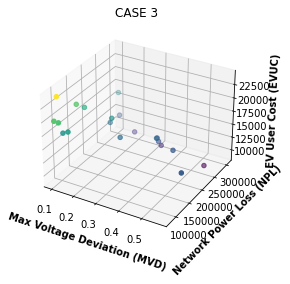

In [42]:

import matplotlib.pyplot as plt
import math

def f1(x,zdata,xylis,network):
    
    
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)*100
    
    return vdev
def f2(x,zdata,xylis,network):
    
    
    df2 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df2.p0.iloc[0][i]+df2.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))  
    return abs(nploss*250.57)

def f3(x,zdata,xylis,network):
    s = 0
    
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    return s
    

problem = Problem(num_of_variables=6, objectives=[f1, f2,f3], variables_range=[(1, 118)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
evol = evo.evolve()
func = [i.objectives for i in evol]

ax = plt.axes(projection='3d')
plt.title("CASE 3")
function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
function3 = [i[2] for i in func]
ax.set_xlabel('Max Voltage Deviation (MVD)', fontweight ='bold')
ax.set_ylabel('Network Power Loss (NPL)', fontweight ='bold')
ax.set_zlabel('EV User Cost (EVUC)', fontweight ='bold')
ax.scatter3D(function1, function2, function3, c=function3);

treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)
feat=[i.features for i in evol]
for i in range(len(func)):
    if minimaxval[0]==func[i][0]:
        print(feat[i])



In [ ]:
ax = plt.axes(projection='3d')
function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
function3 = [i[2] for i in func]
ax.scatter3D(function1, function2, function3, c=function3)


In [ ]:
print(func)

In [46]:
def sdcnew(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        
        
    sdcval=0
    for x in range(1,ns+1):
        
        value=sdc(x)
        sdcval+=value
        
    print(sdcval)

In [48]:
sdcnew([11,56,61,65,78,112])

4993152.576000003


In [49]:
sdcnew([7,12,15,24,70,71])

4993152.576000003
